0.095
r_g=3: theta_1, i, phi, amp_1, amp_2 [-0.78009055  1.40793398  0.00603561  0.37017742  0.11665143]


Text(0, 0.5, 'Counts')

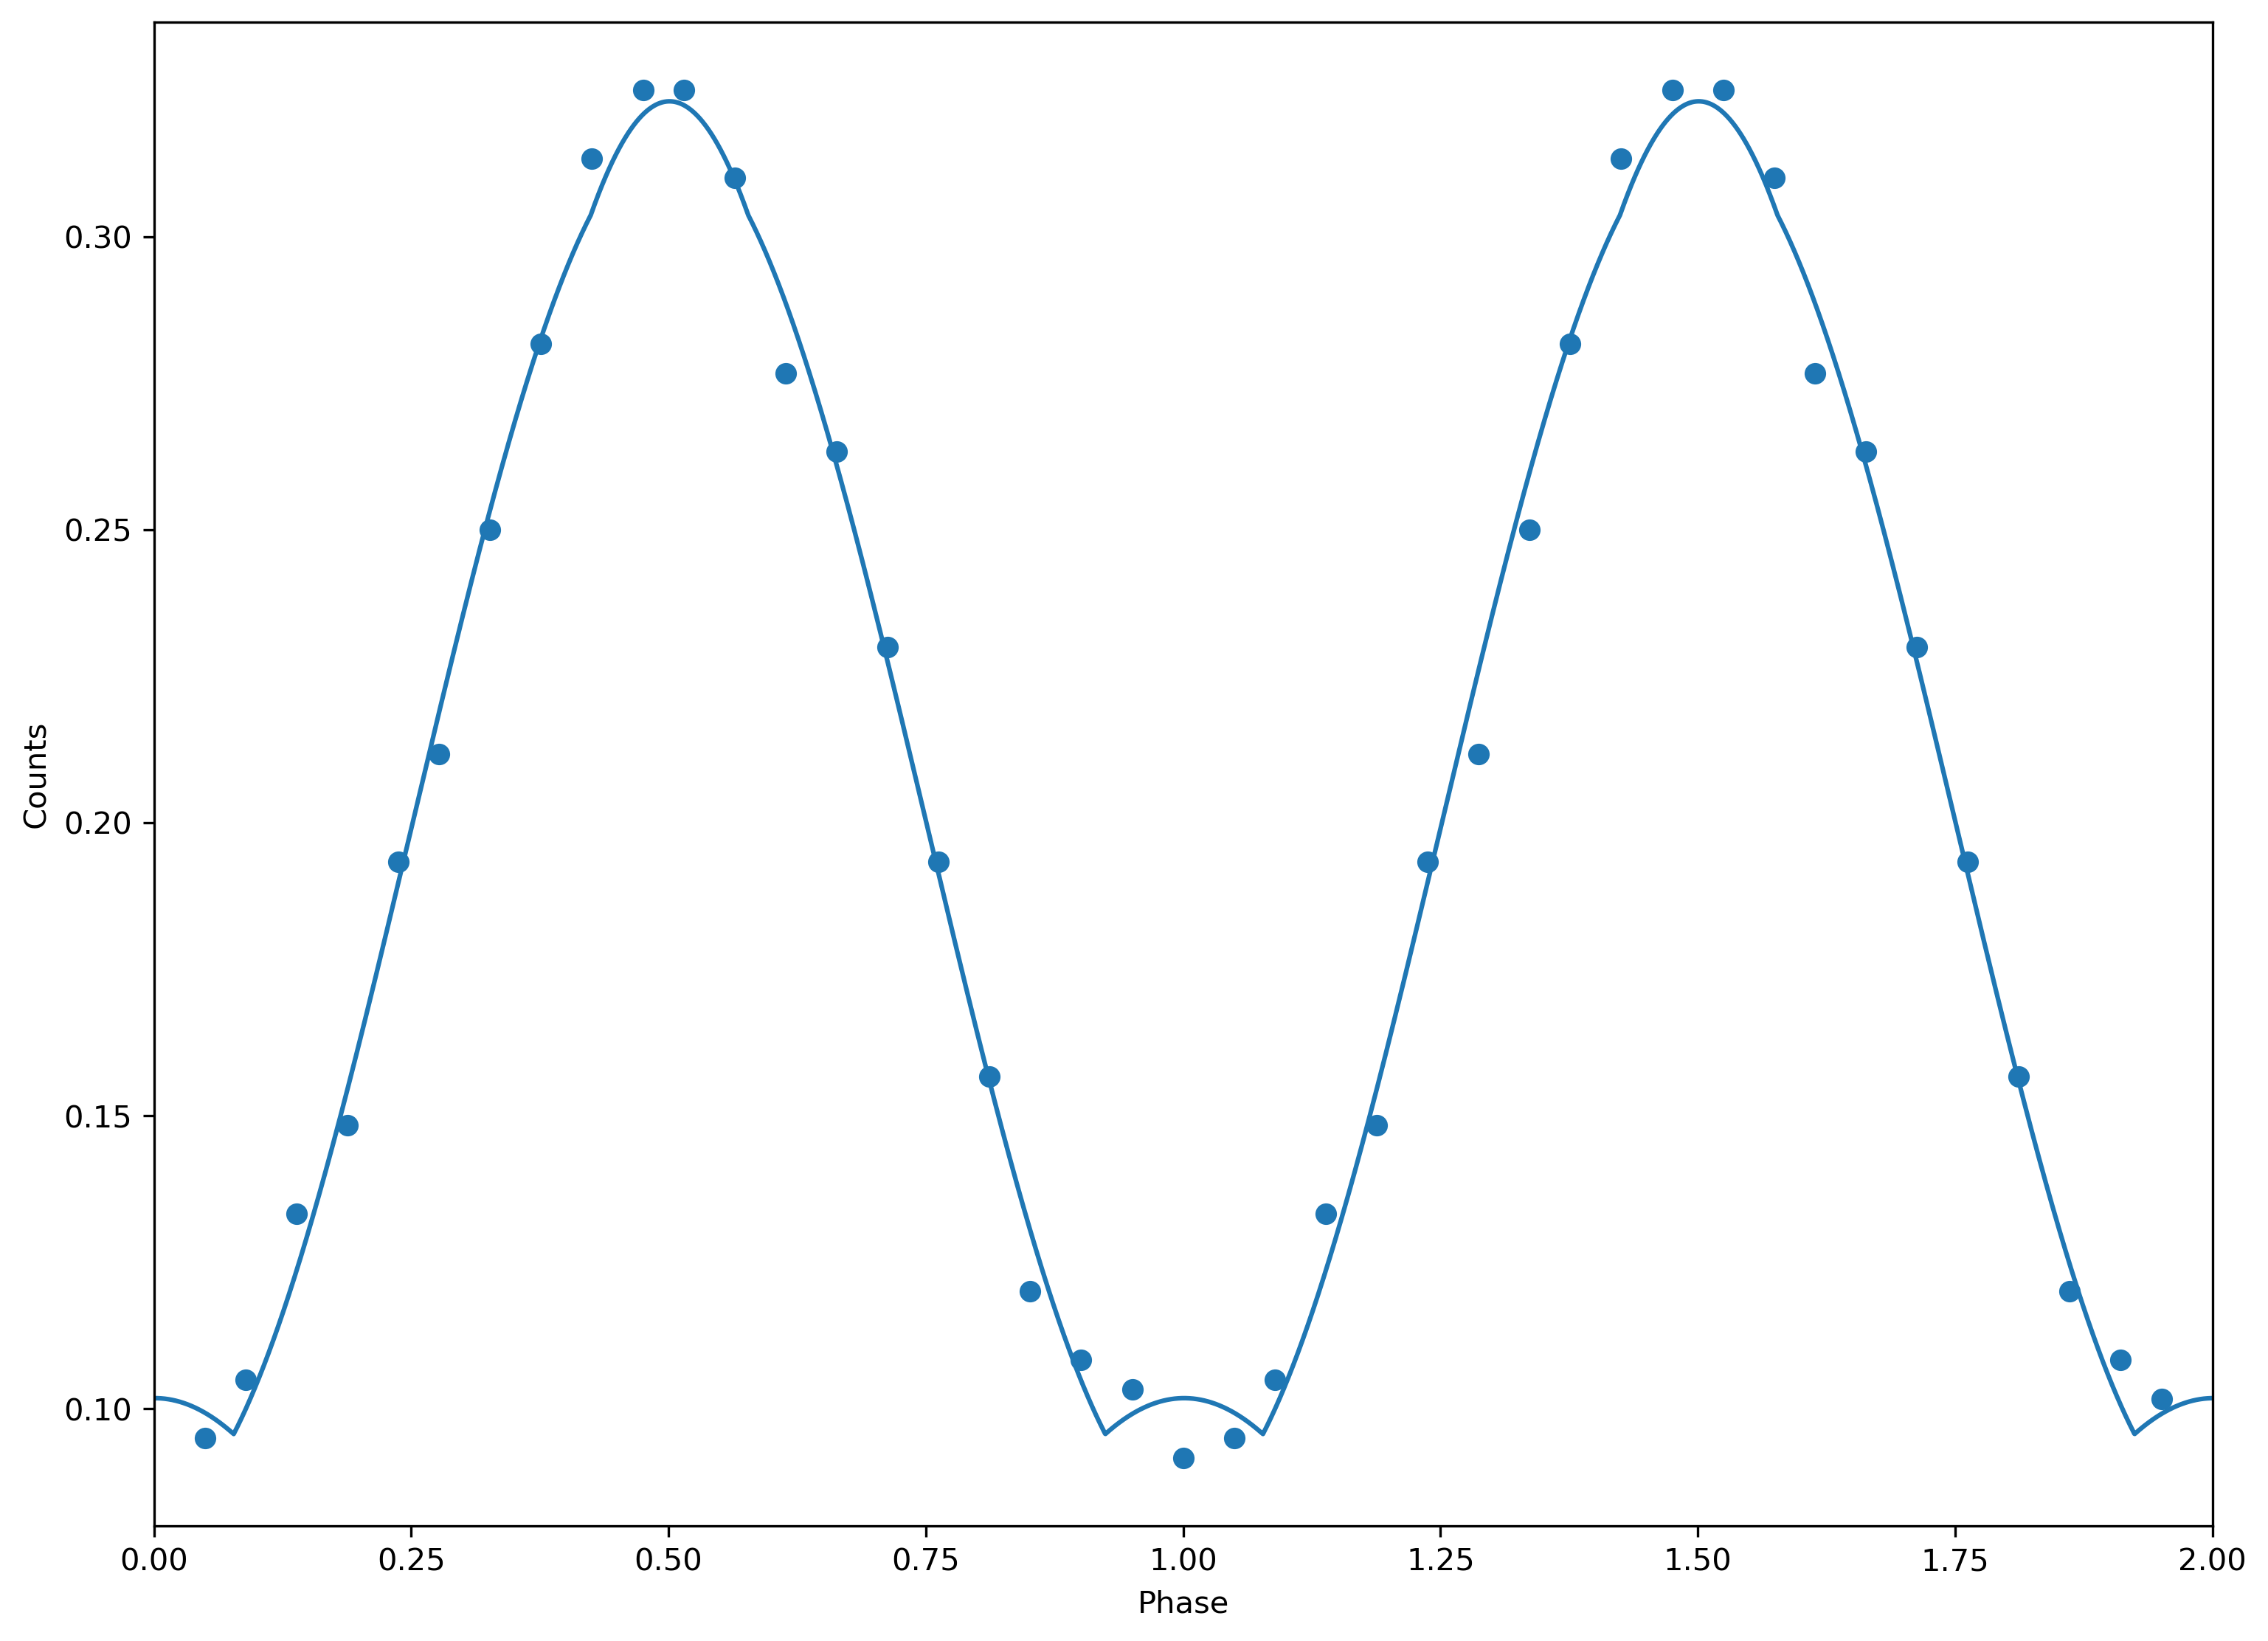

In [7]:
# 3XMM J185246.6+003317
# set lapse as 1/3, 2 hot spots, 軸対象, 定常放射なし



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu_1(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

def mu_2(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * (x - 1) - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('3XMM J185246.6+003317_0.3-10keV_MOS2_2008.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([0, 1, 0.2, 0.5, 0.1])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func_1(x, a, b, c, d, e):
    return (mu_1(x, a, b, c, d) + abs(mu_1(x, a, b, c, d))) / 2 + (mu_2(x, -a, b, c, e) + abs(mu_2(x, -a, b, c, e))) / 2



# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func_1, x_data, y_data, p0 = parameter_initial)
print("r_g=3: theta_1, i, phi, amp_1, amp_2", paramater_optimal_1)
fitting_1 = func_1(x, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2], paramater_optimal_1[3], paramater_optimal_1[4])

# paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func_2, x_data, y_data, p0 = parameter_initial)
# print("r_g=3: theta, i amp, quisent =", paramater_optimal_2)
# fitting_2 = func_2(x, paramater_optimal_2[0], paramater_optimal_2[1], paramater_optimal_2[2], paramater_optimal_2[3])

#calculate reduced chisq of this model
y_fit = func_1(x_data, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2], paramater_optimal_1[3], paramater_optimal_1[4])
r = y_data - y_fit
#stdev = 51 / 2793 * y_data
#chisq = np.sum((r / stdev) ** 2)
#N_data = 40 #number of data
#N_para = 5 #number of parameters (of model) used for fitting
#dof = N_data - N_para
#reduced_chisq = chisq / dof

#print("chisq is " , chisq)
#print("Reduced chisq is ", reduced_chisq)

# fig, ax1 = plt.subplots(dpi = 300, figsize = (12, 9))
# plt.scatter(x_data, y_data)
# plt.xlim(0, 2)
# ax1.plot(x, fitting_1, label='r_g=2')
# ax1.set_xlabel('Phase')
# ax1.set_ylabel('Counts')
# ax2 = ax1.twinx()
# ax2.plot(x, fitting_2, color = 'r', label='r_g=3')
# ax1.legend()
# ax2.legend(loc = 'lower right')
# plt.show()

fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting_1)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

0.095
r_g=3: theta_1, i, amp [-1.31467121  0.54883395  0.01037781  0.38118046]


Text(0, 0.5, 'Counts')

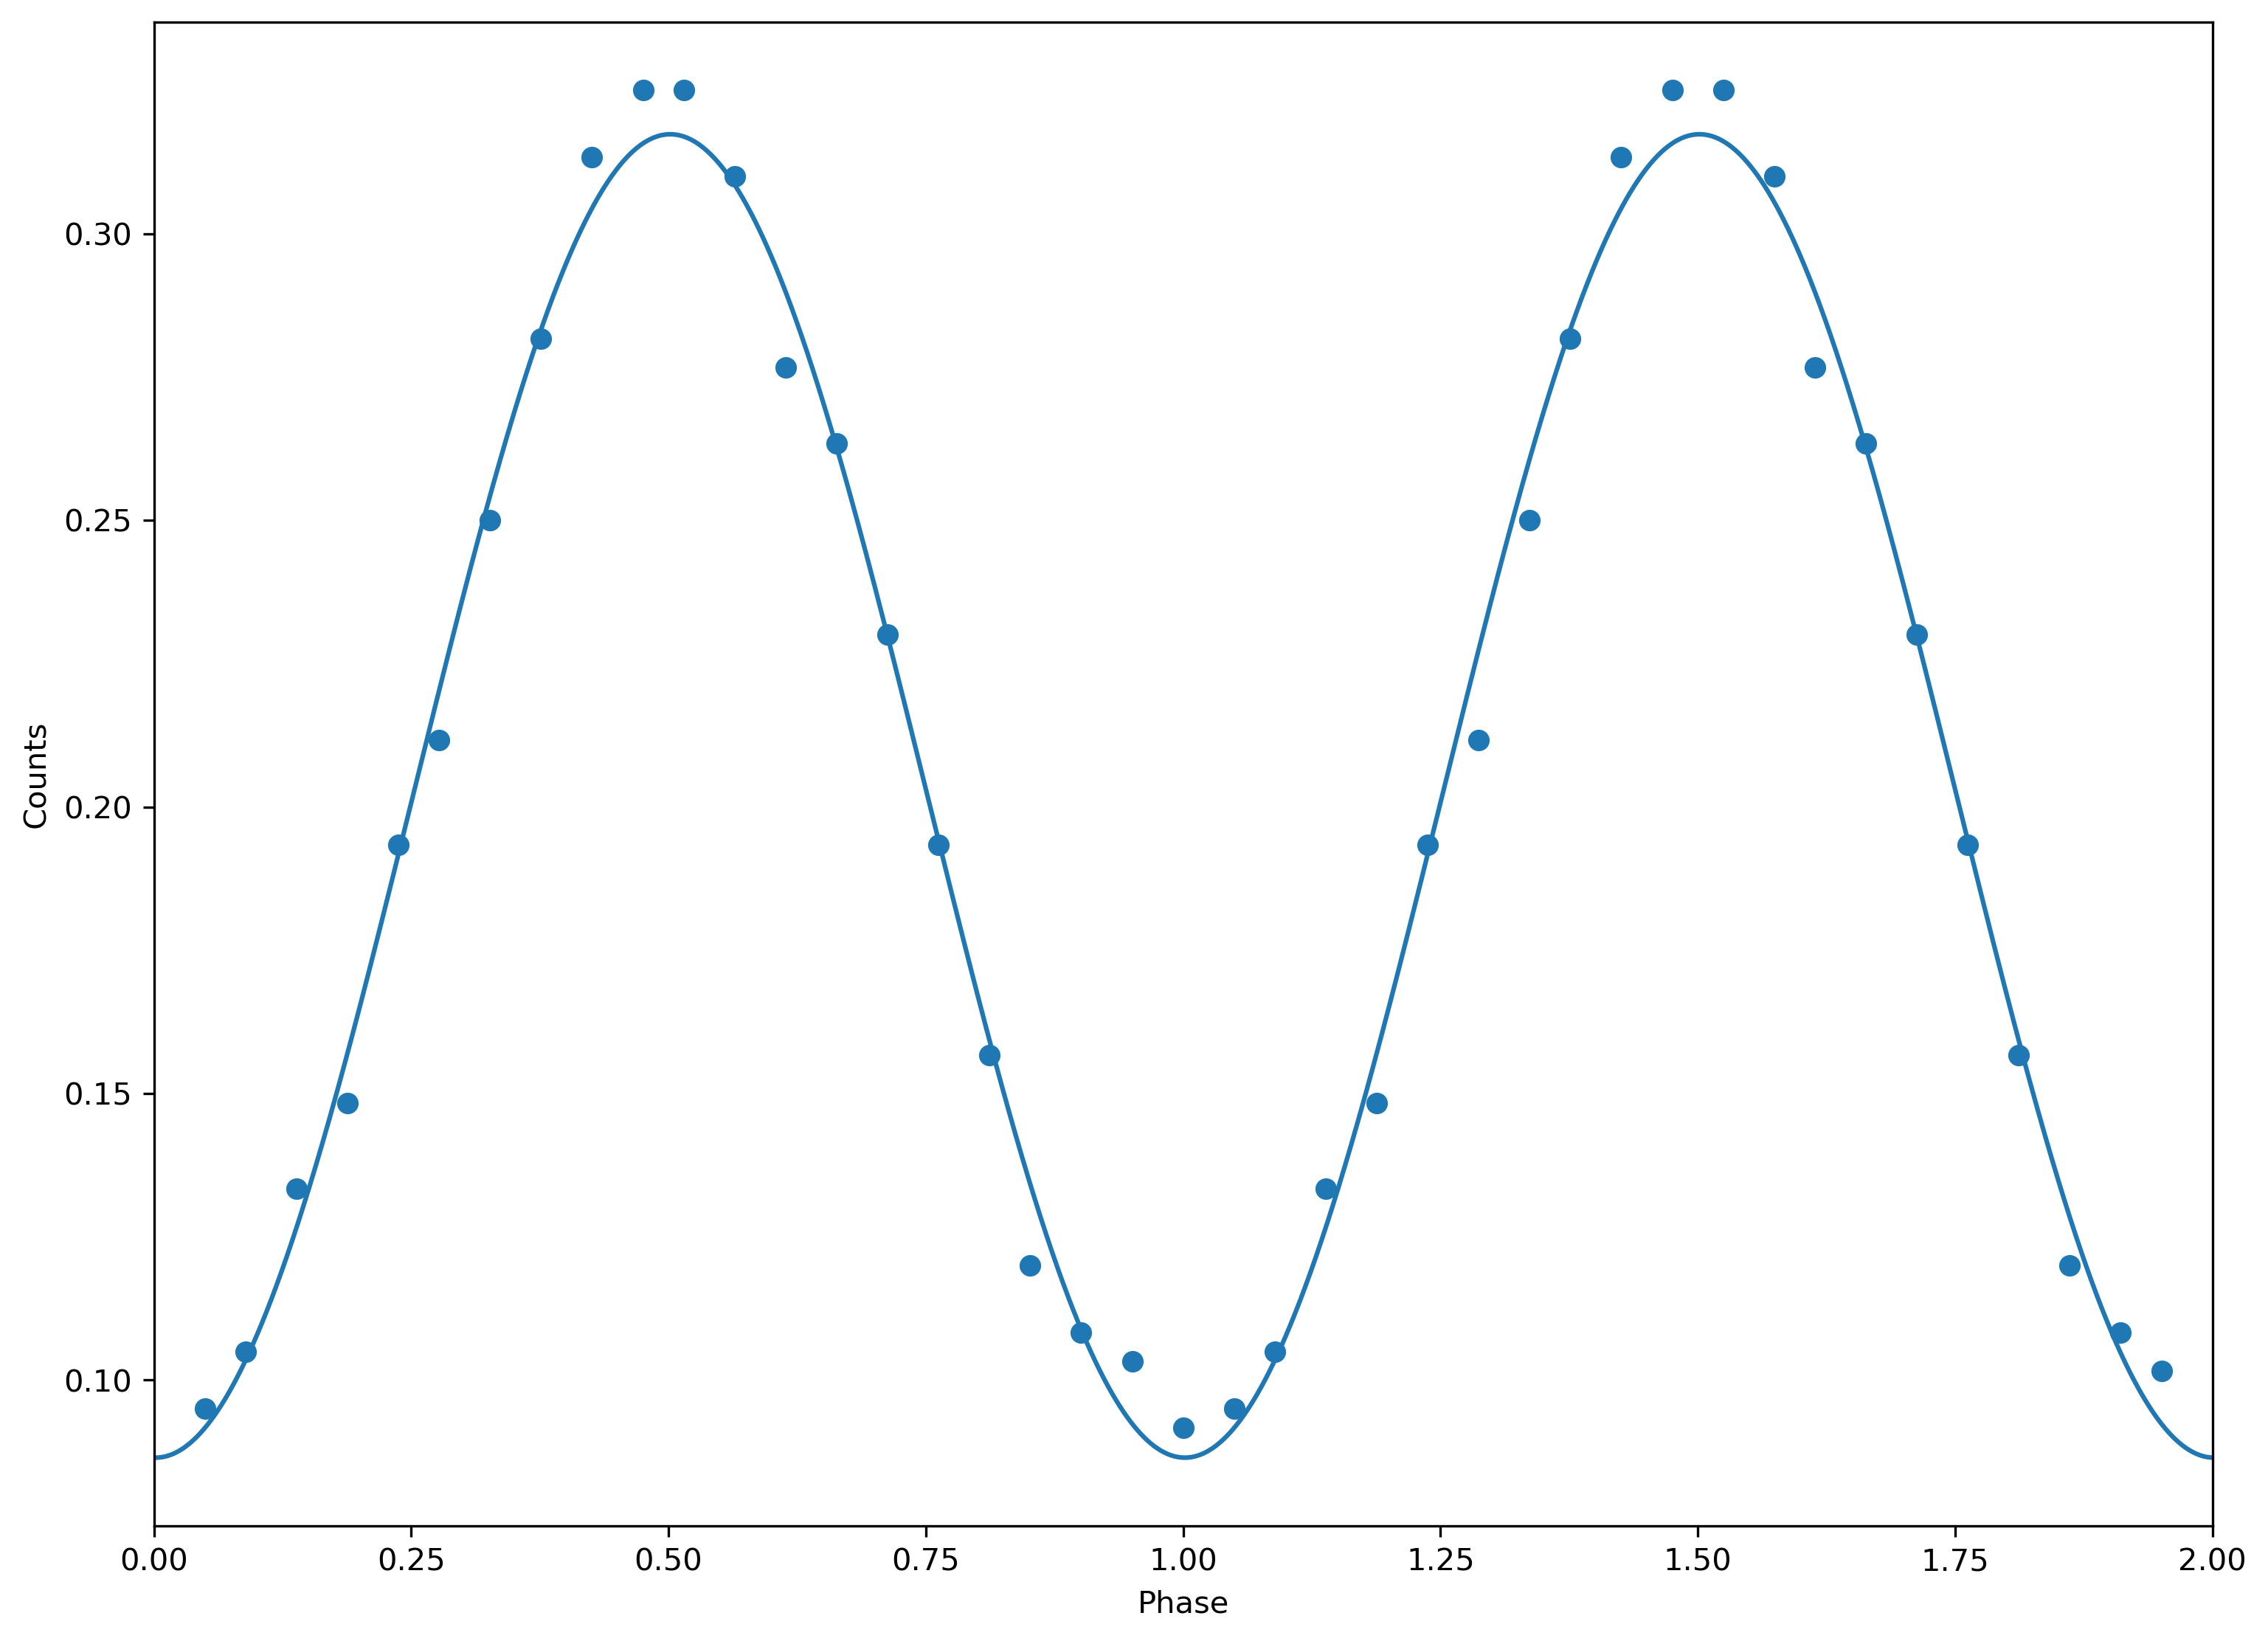

In [6]:
#set lapse as 1/3, single hot spot with beaming effect

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 2.5) + 1. / 2.5)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('3XMM J185246.6+003317_0.3-10keV_MOS2_2008.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([1.5, 1, 0.2, 0.5])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
print("r_g=3: theta_1, i, amp", paramater_optimal)
fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2],  paramater_optimal[3])

y_fit = func(x_data, *paramater_optimal)
# r = y_data - y_fit
# stdev = 51 / 2793 * y_data
# chisq = np.sum((r / stdev) ** 2)
# N_data = 40
# N_para = 6
# dof = N_data - N_para
# reduced_chisq = chisq / dof

# print("chisq is " , chisq)
# print("Reduced chisq is ", reduced_chisq)


fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

-0.0439501752815692
r_g=3: theta_1, i, phi, amp_1, amp_2 [-0.78039216  2.44524408  0.32252604  0.45461746 -0.36747531]


Text(0, 0.5, 'Counts')

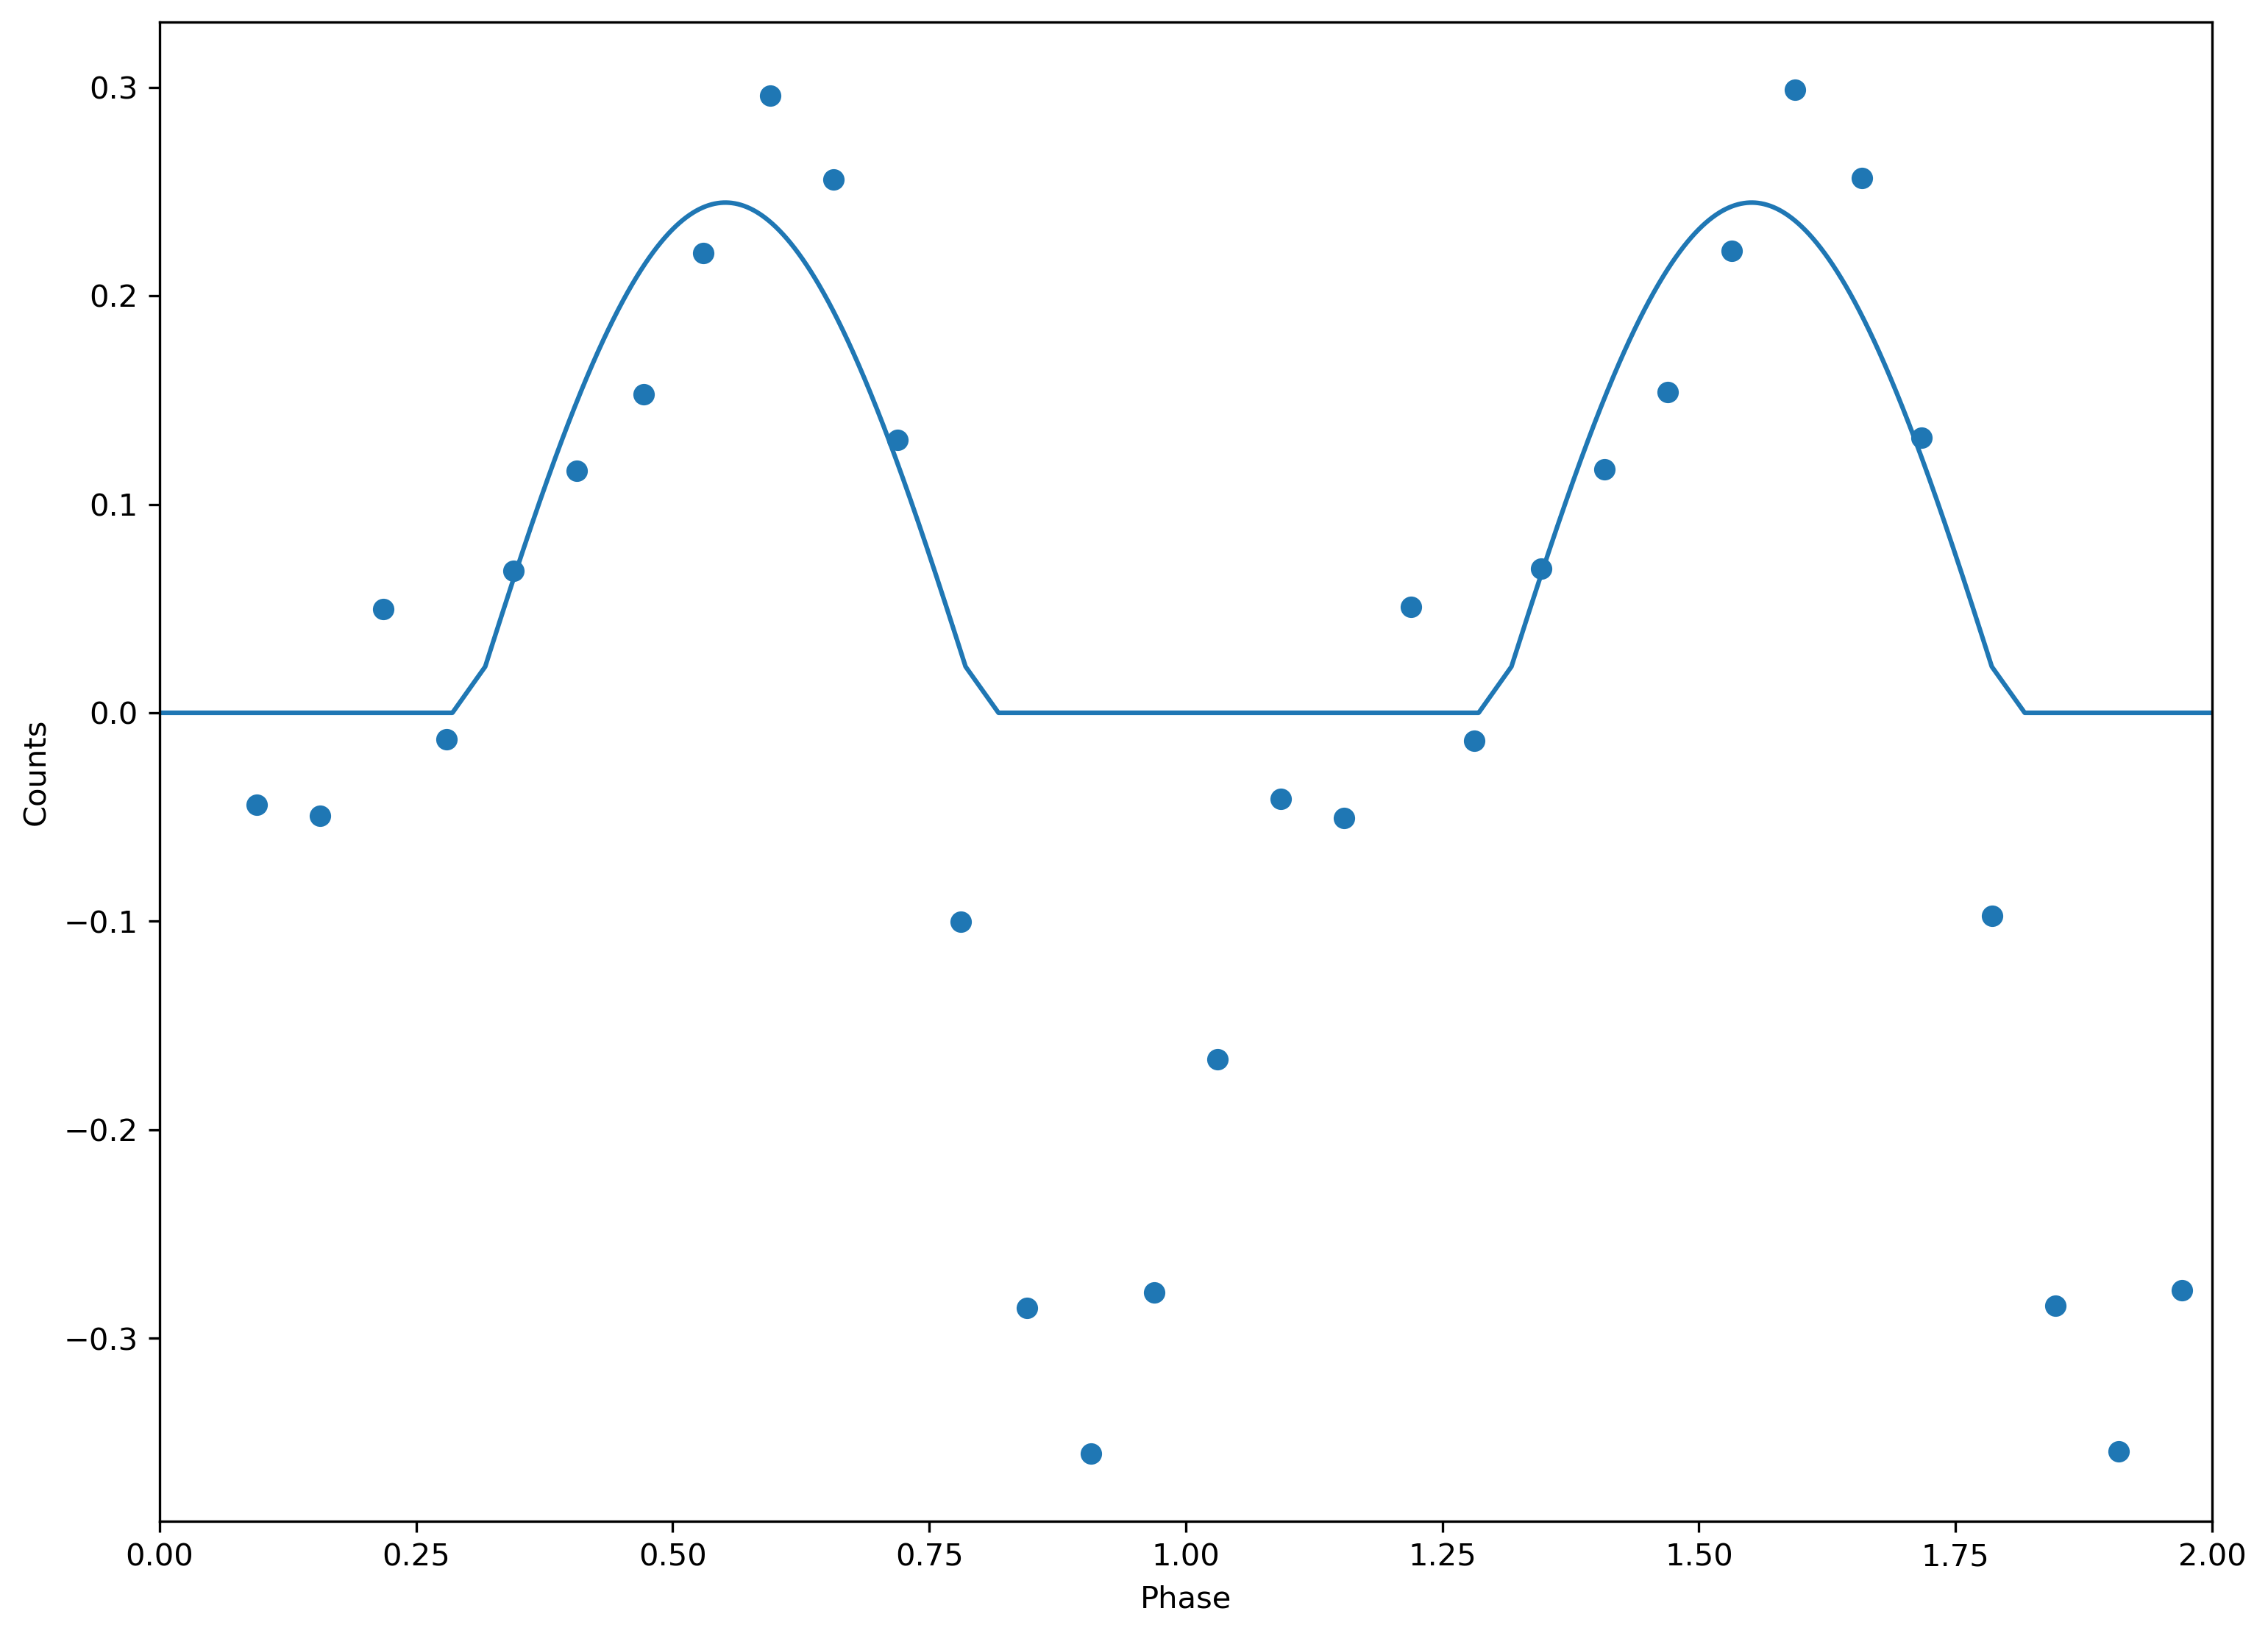

In [8]:
# 4U 0142+61_3.7-9.2keV_mean_subtracted
# set lapse as 1/3, 2 hot spots, 軸対象, 定常放射なし



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu_1(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

def mu_2(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * (x - 1) - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('4U 0142+61_3.7-9.2keV_mean_subtracted.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([0, 1, 0.2, 0.5, 0.1])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func_1(x, a, b, c, d, e):
    return (mu_1(x, a, b, c, d) + abs(mu_1(x, a, b, c, d))) / 2 + (mu_2(x, -a, b, c, e) + abs(mu_2(x, -a, b, c, e))) / 2



# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func_1, x_data, y_data, p0 = parameter_initial)
print("r_g=3: theta_1, i, phi, amp_1, amp_2", paramater_optimal_1)
fitting_1 = func_1(x, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2], paramater_optimal_1[3], paramater_optimal_1[4])

# paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func_2, x_data, y_data, p0 = parameter_initial)
# print("r_g=3: theta, i amp, quisent =", paramater_optimal_2)
# fitting_2 = func_2(x, paramater_optimal_2[0], paramater_optimal_2[1], paramater_optimal_2[2], paramater_optimal_2[3])

#calculate reduced chisq of this model
y_fit = func_1(x_data, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2], paramater_optimal_1[3], paramater_optimal_1[4])
r = y_data - y_fit
#stdev = 51 / 2793 * y_data
#chisq = np.sum((r / stdev) ** 2)
#N_data = 40 #number of data
#N_para = 5 #number of parameters (of model) used for fitting
#dof = N_data - N_para
#reduced_chisq = chisq / dof

#print("chisq is " , chisq)
#print("Reduced chisq is ", reduced_chisq)

# fig, ax1 = plt.subplots(dpi = 300, figsize = (12, 9))
# plt.scatter(x_data, y_data)
# plt.xlim(0, 2)
# ax1.plot(x, fitting_1, label='r_g=2')
# ax1.set_xlabel('Phase')
# ax1.set_ylabel('Counts')
# ax2 = ax1.twinx()
# ax2.plot(x, fitting_2, color = 'r', label='r_g=3')
# ax1.legend()
# ax2.legend(loc = 'lower right')
# plt.show()

fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting_1)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

-0.0439501752815692
r_g=3: theta_1, i, amp [ 1.17478360e+01  1.78123257e+01 -4.26577938e-03 -4.40111956e+00]


C:\Users\sojo_\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0, 0.5, 'Counts')

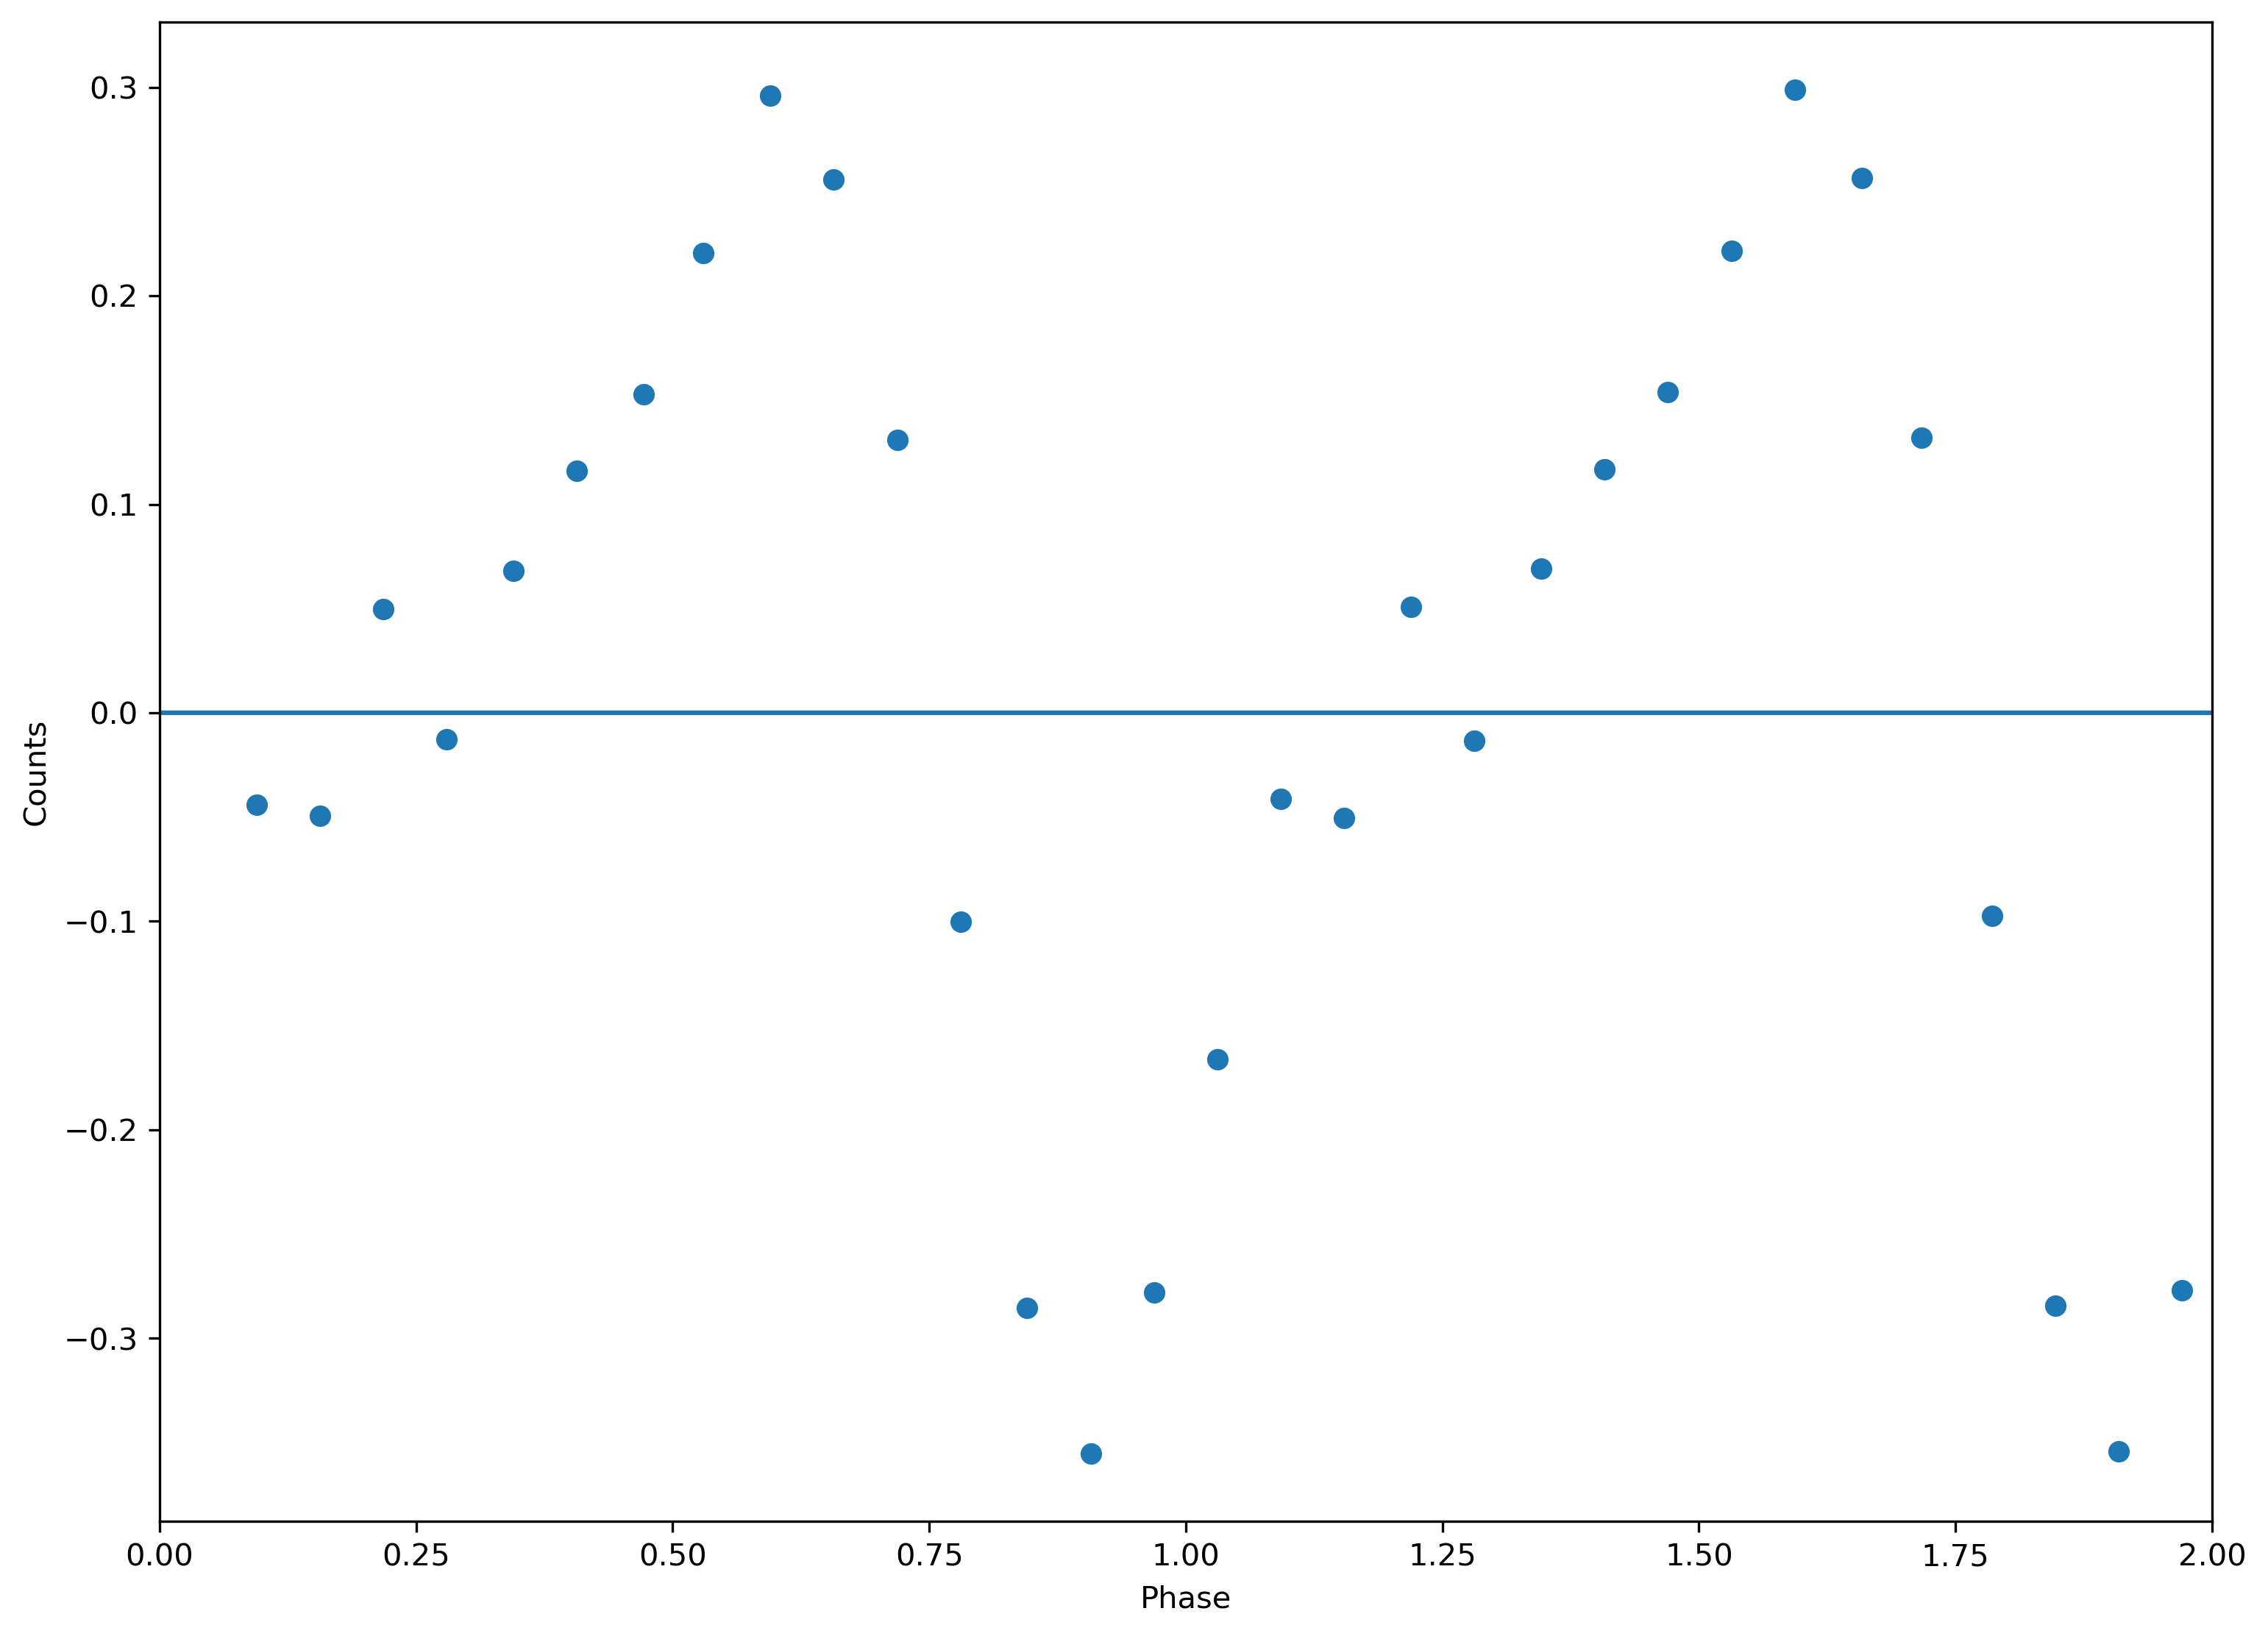

In [9]:
#set lapse as 1/3, single hot spot with beaming effect

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 2.5) + 1. / 2.5)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('4U 0142+61_3.7-9.2keV_mean_subtracted.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([-1.5, 1, 0.2, 0.5])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
print("r_g=3: theta_1, i, amp", paramater_optimal)
fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2],  paramater_optimal[3])

y_fit = func(x_data, *paramater_optimal)
# r = y_data - y_fit
# stdev = 51 / 2793 * y_data
# chisq = np.sum((r / stdev) ** 2)
# N_data = 40
# N_para = 6
# dof = N_data - N_para
# reduced_chisq = chisq / dof

# print("chisq is " , chisq)
# print("Reduced chisq is ", reduced_chisq)


fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

0.0916800090017658
r_g=3: theta_1, i, phi, amp_1, amp_2 [ 0.17190538  2.65640191 -0.4334476   0.62197934 -0.33711105]


C:\Users\sojo_\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0, 0.5, 'Counts')

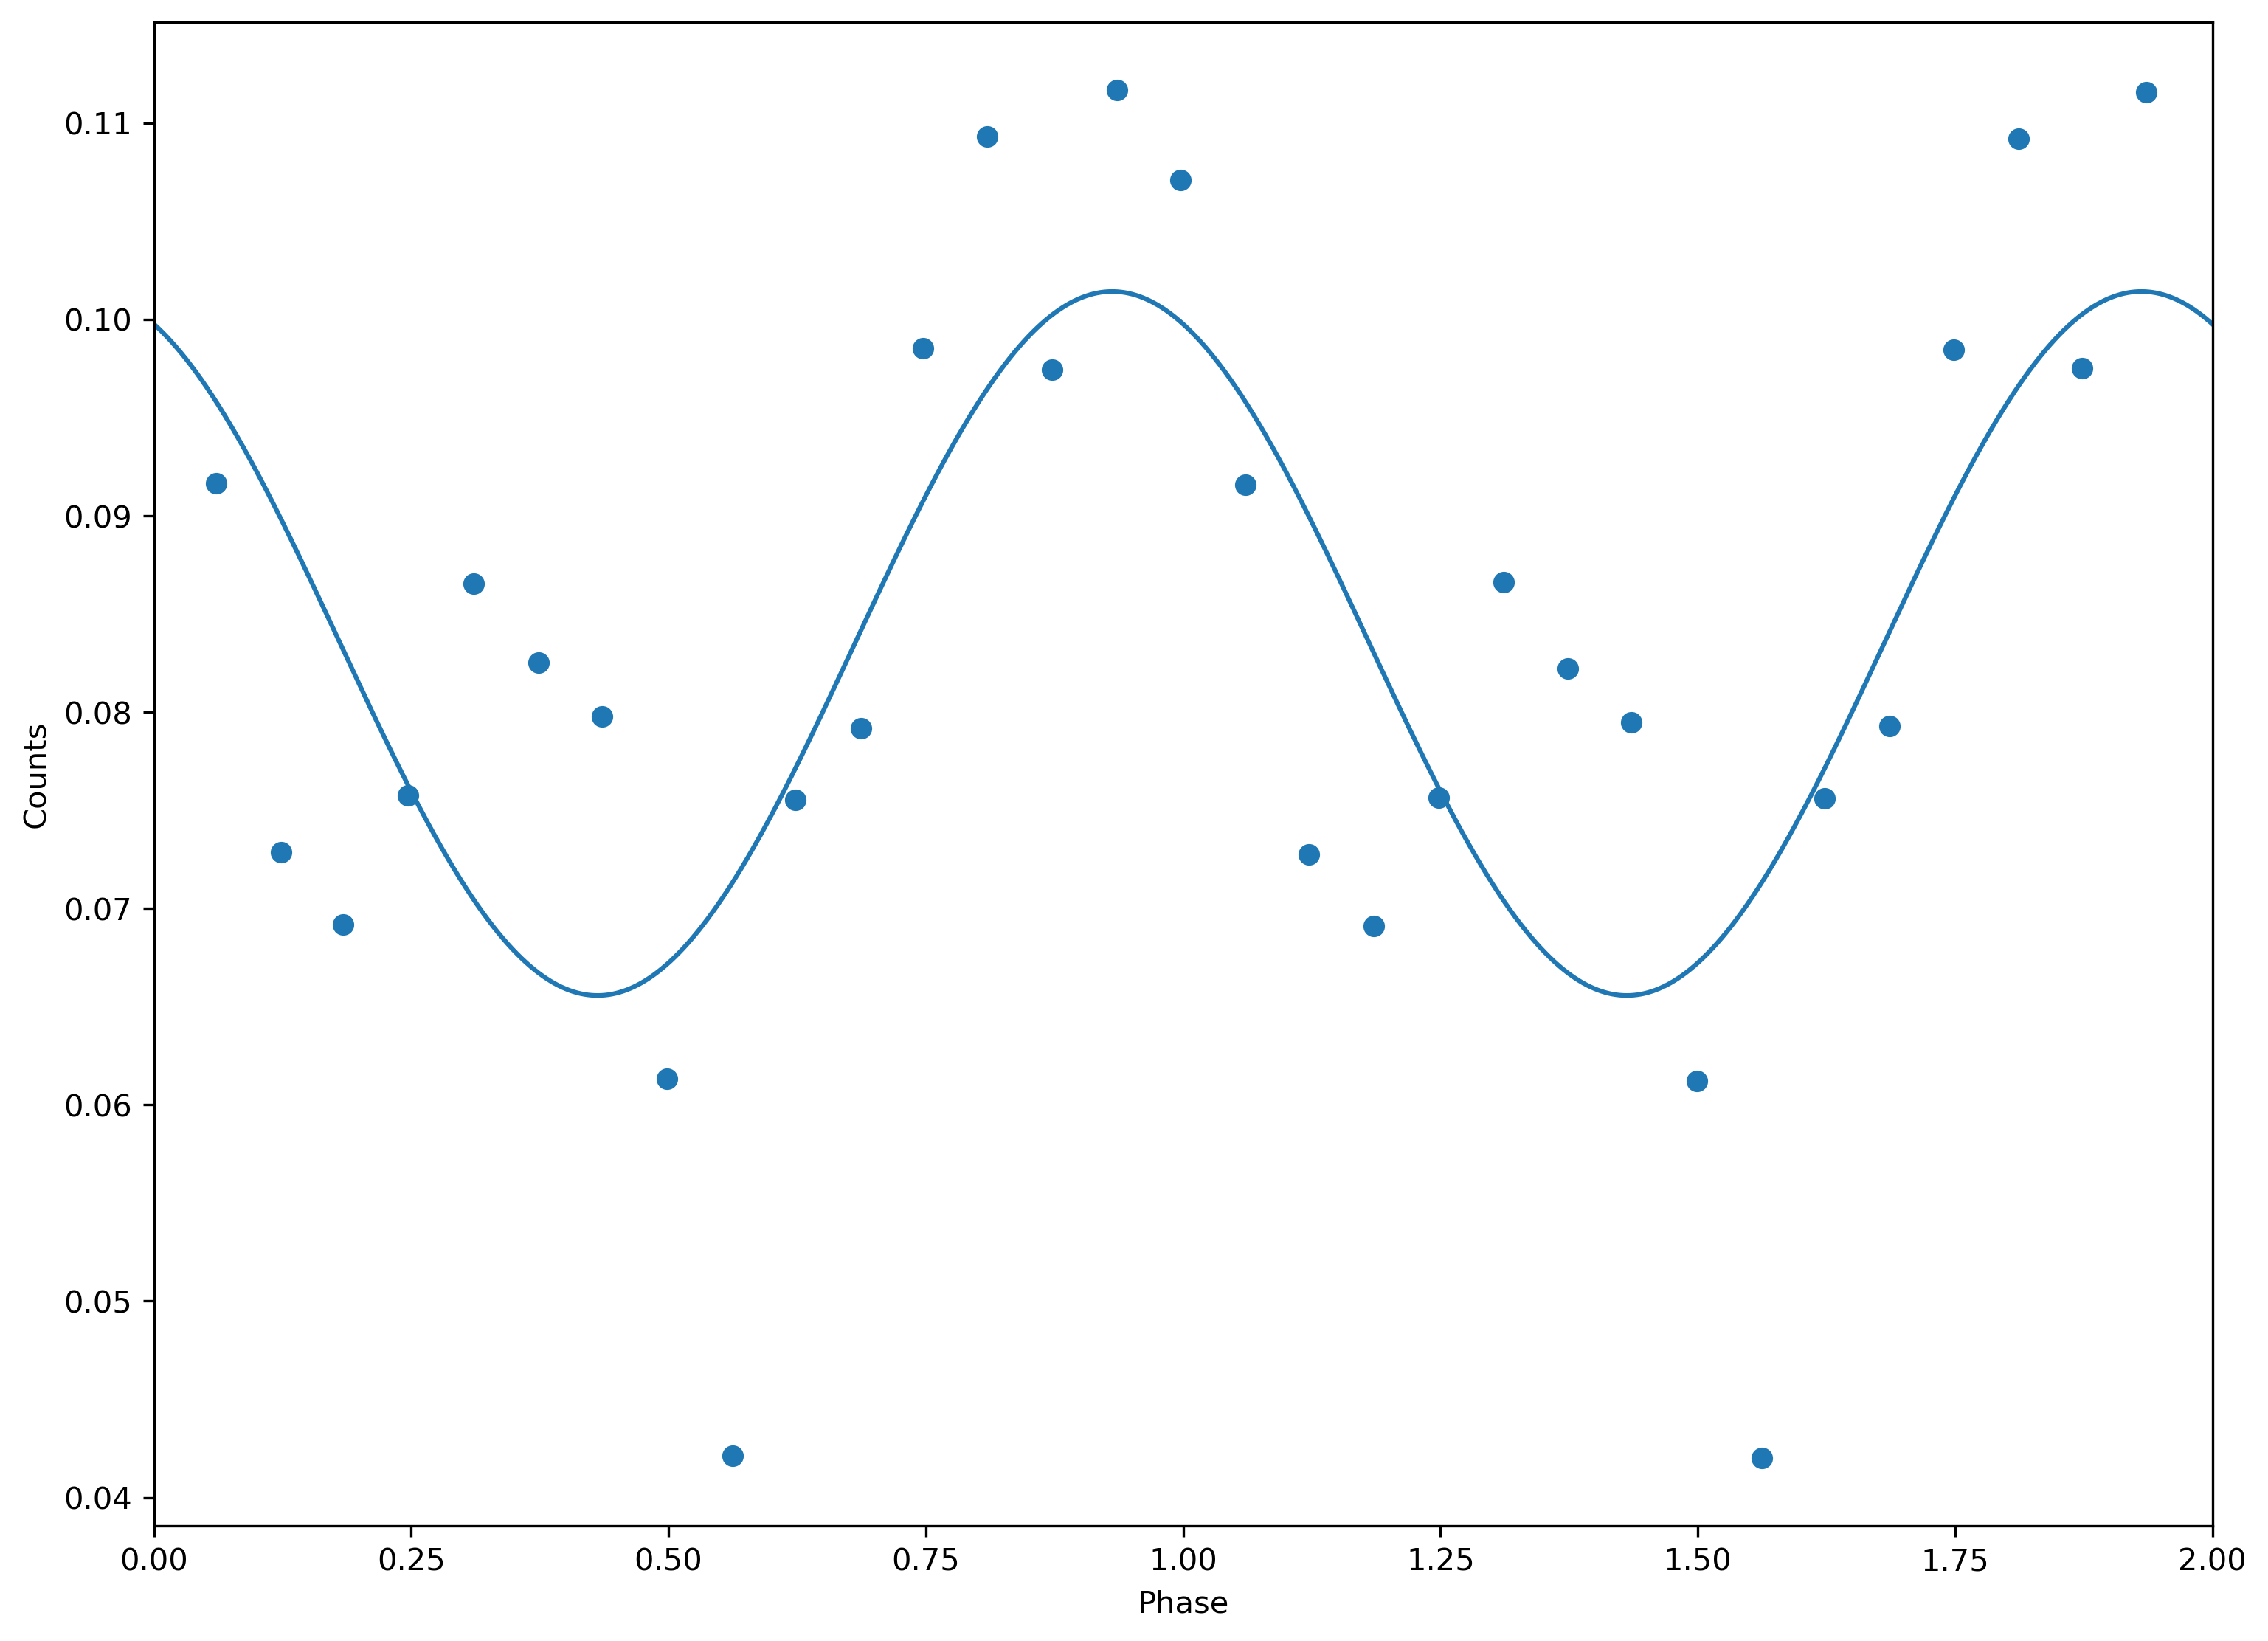

In [10]:
# CXOU J010043.1-721134
# set lapse as 1/3, 2 hot spots, 軸対象, 定常放射なし



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu_1(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

def mu_2(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * (x - 1) - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('CXOU J010043.1-721134_observation_B_1.3-8keV.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([0, 1, 0.2, 0.5, 0.1])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func_1(x, a, b, c, d, e):
    return (mu_1(x, a, b, c, d) + abs(mu_1(x, a, b, c, d))) / 2 + (mu_2(x, -a, b, c, e) + abs(mu_2(x, -a, b, c, e))) / 2



# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func_1, x_data, y_data, p0 = parameter_initial)
print("r_g=3: theta_1, i, phi, amp_1, amp_2", paramater_optimal_1)
fitting_1 = func_1(x, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2], paramater_optimal_1[3], paramater_optimal_1[4])

# paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func_2, x_data, y_data, p0 = parameter_initial)
# print("r_g=3: theta, i amp, quisent =", paramater_optimal_2)
# fitting_2 = func_2(x, paramater_optimal_2[0], paramater_optimal_2[1], paramater_optimal_2[2], paramater_optimal_2[3])

#calculate reduced chisq of this model
y_fit = func_1(x_data, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2], paramater_optimal_1[3], paramater_optimal_1[4])
r = y_data - y_fit
#stdev = 51 / 2793 * y_data
#chisq = np.sum((r / stdev) ** 2)
#N_data = 40 #number of data
#N_para = 5 #number of parameters (of model) used for fitting
#dof = N_data - N_para
#reduced_chisq = chisq / dof

#print("chisq is " , chisq)
#print("Reduced chisq is ", reduced_chisq)

# fig, ax1 = plt.subplots(dpi = 300, figsize = (12, 9))
# plt.scatter(x_data, y_data)
# plt.xlim(0, 2)
# ax1.plot(x, fitting_1, label='r_g=2')
# ax1.set_xlabel('Phase')
# ax1.set_ylabel('Counts')
# ax2 = ax1.twinx()
# ax2.plot(x, fitting_2, color = 'r', label='r_g=3')
# ax1.legend()
# ax2.legend(loc = 'lower right')
# plt.show()

fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting_1)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

0.8246753246753247
r_g=3: theta_1, i, phi, amp_1, amp_2 [-1.33459801  0.66433442  0.08374161  1.44149121  0.73481285]


Text(0, 0.5, 'Counts')

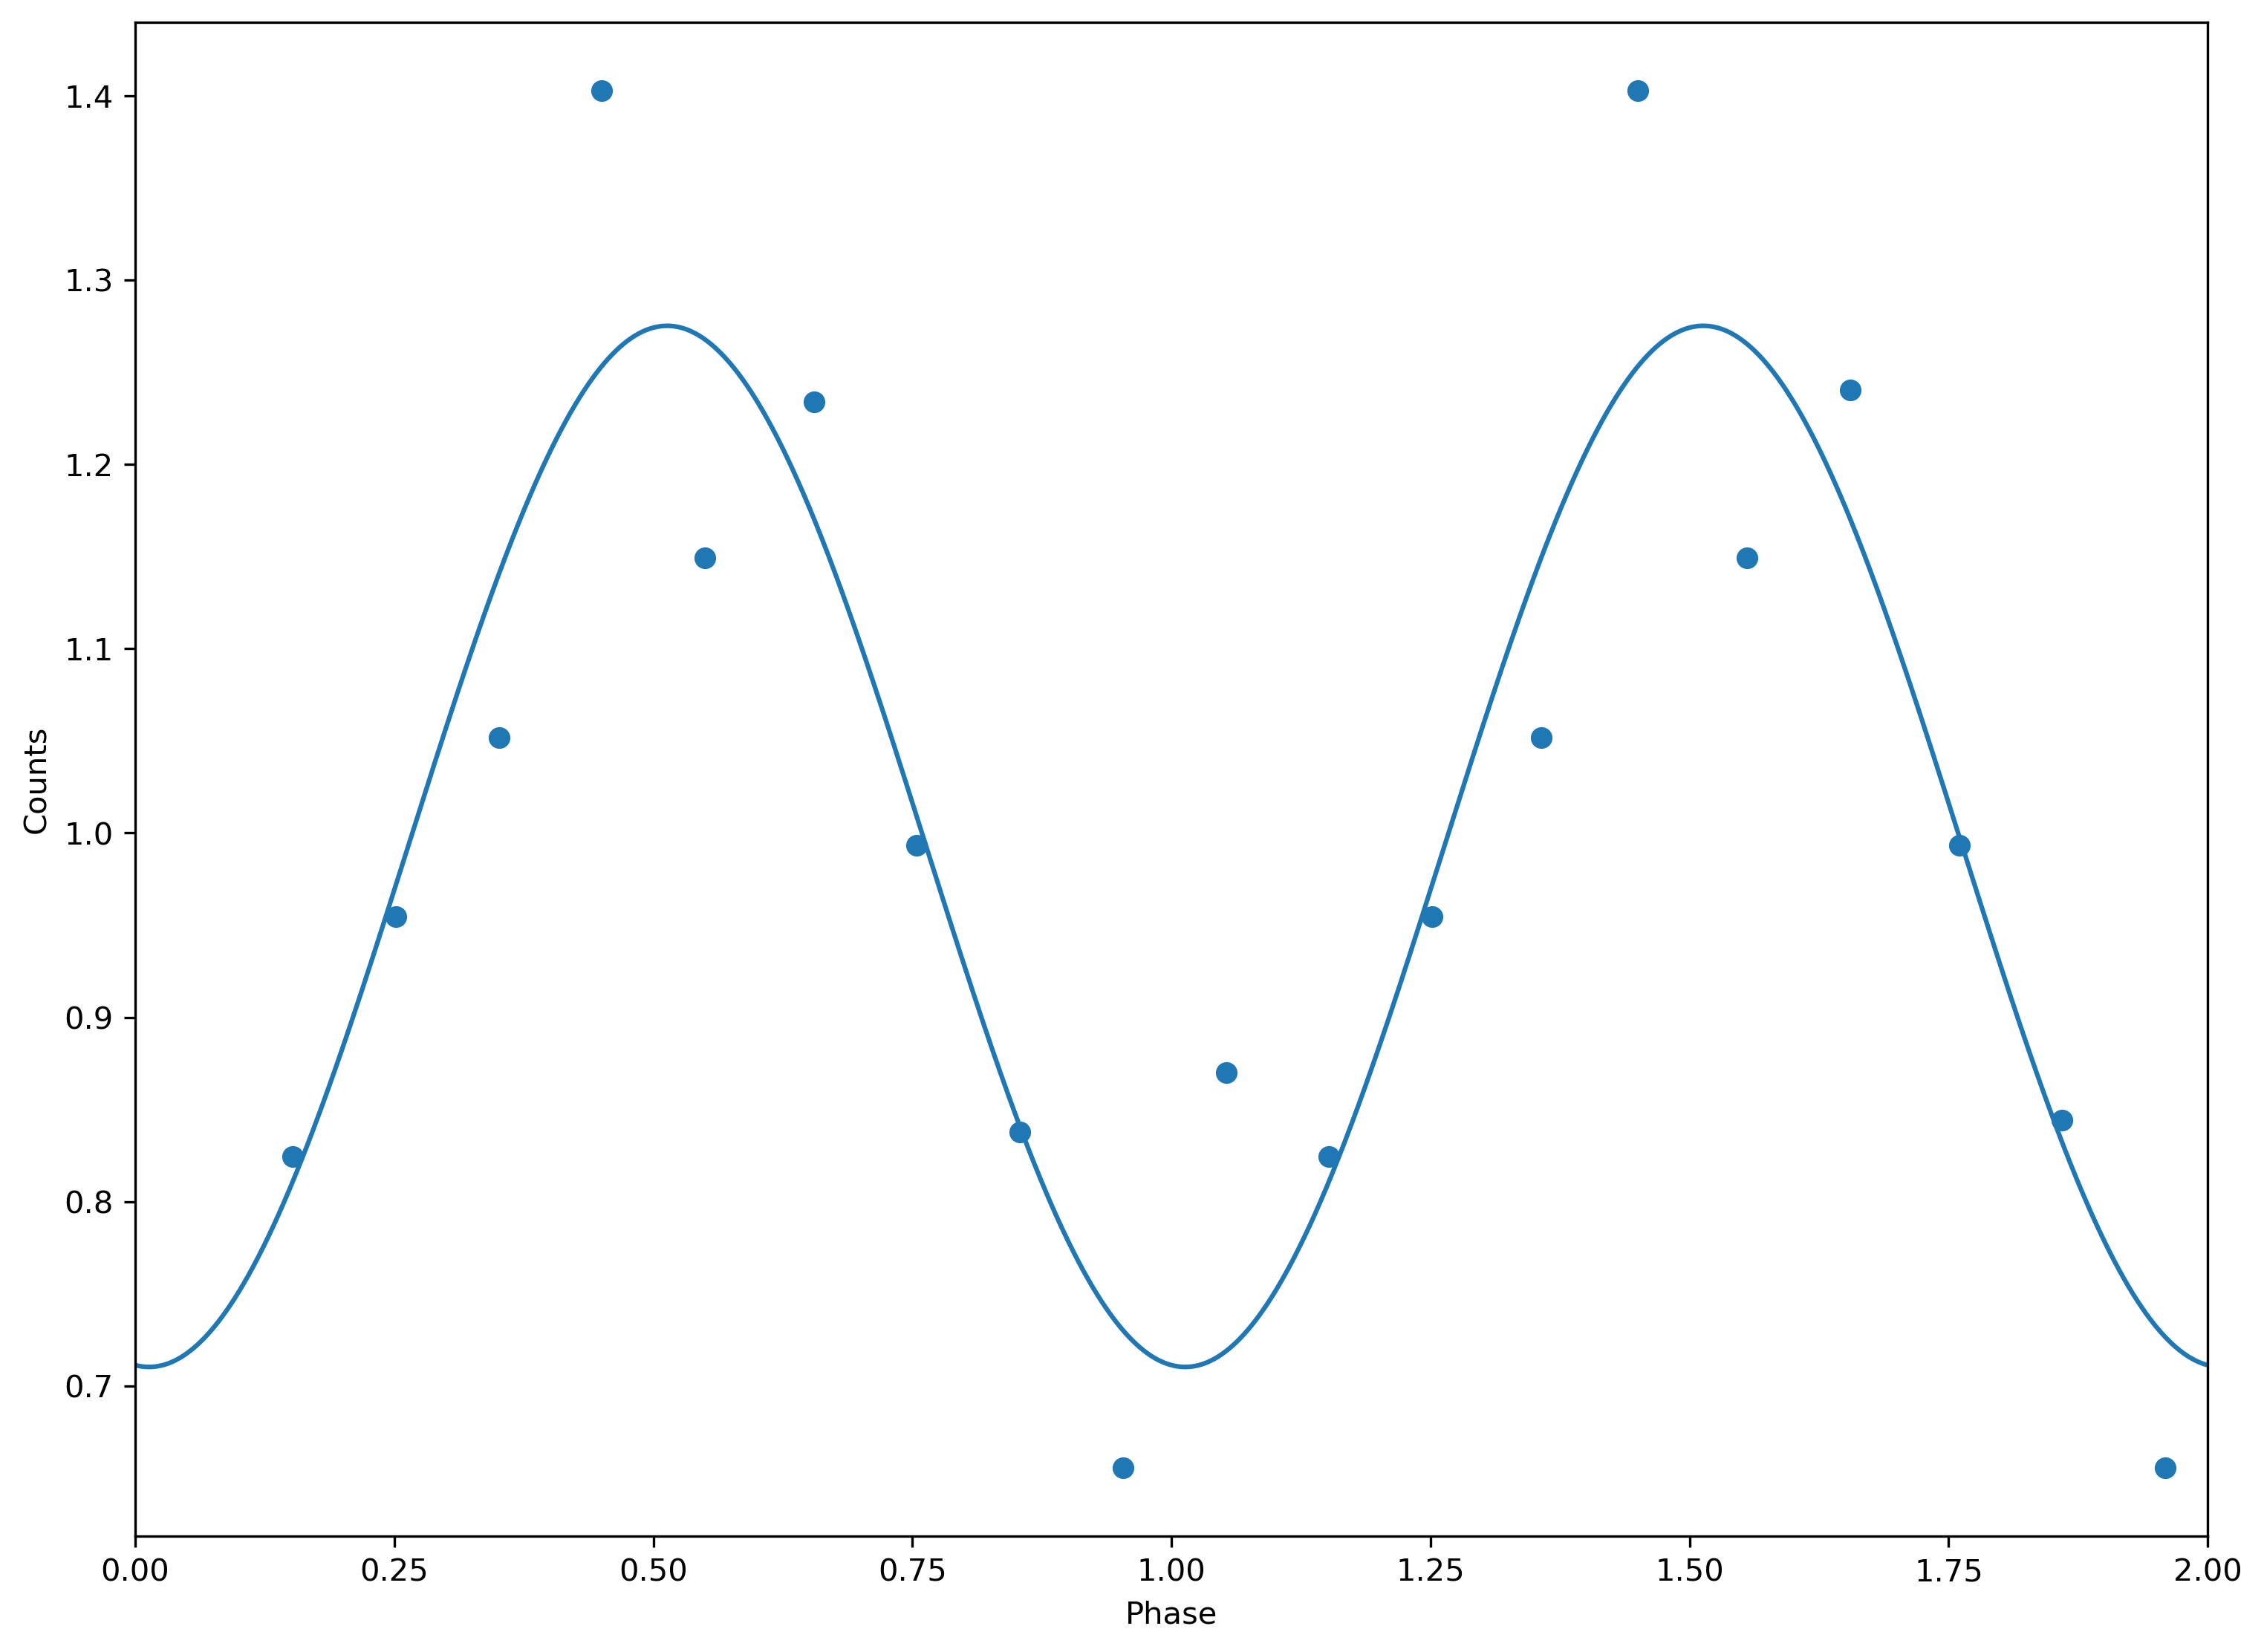

In [11]:
# CXOU J171405.7-381031
# set lapse as 1/3, 2 hot spots, 軸対象, 定常放射なし



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu_1(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

def mu_2(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * (x - 1) - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('CXOU J171405.7-381031_0.5-10keV_ASCA_GIS.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([0, 1, 0.2, 0.5, 0.1])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func_1(x, a, b, c, d, e):
    return (mu_1(x, a, b, c, d) + abs(mu_1(x, a, b, c, d))) / 2 + (mu_2(x, -a, b, c, e) + abs(mu_2(x, -a, b, c, e))) / 2



# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func_1, x_data, y_data, p0 = parameter_initial)
print("r_g=3: theta_1, i, phi, amp_1, amp_2", paramater_optimal_1)
fitting_1 = func_1(x, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2], paramater_optimal_1[3], paramater_optimal_1[4])

# paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func_2, x_data, y_data, p0 = parameter_initial)
# print("r_g=3: theta, i amp, quisent =", paramater_optimal_2)
# fitting_2 = func_2(x, paramater_optimal_2[0], paramater_optimal_2[1], paramater_optimal_2[2], paramater_optimal_2[3])

#calculate reduced chisq of this model
y_fit = func_1(x_data, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2], paramater_optimal_1[3], paramater_optimal_1[4])
r = y_data - y_fit
#stdev = 51 / 2793 * y_data
#chisq = np.sum((r / stdev) ** 2)
#N_data = 40 #number of data
#N_para = 5 #number of parameters (of model) used for fitting
#dof = N_data - N_para
#reduced_chisq = chisq / dof

#print("chisq is " , chisq)
#print("Reduced chisq is ", reduced_chisq)

# fig, ax1 = plt.subplots(dpi = 300, figsize = (12, 9))
# plt.scatter(x_data, y_data)
# plt.xlim(0, 2)
# ax1.plot(x, fitting_1, label='r_g=2')
# ax1.set_xlabel('Phase')
# ax1.set_ylabel('Counts')
# ax2 = ax1.twinx()
# ax2.plot(x, fitting_2, color = 'r', label='r_g=3')
# ax1.legend()
# ax2.legend(loc = 'lower right')
# plt.show()

fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting_1)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

1871.1111111111109
r_g=3: theta_1, i, phi, amp_1, amp_2 [ 4.92786569e-01 -8.10327443e+01  6.12491899e-01  9.19771260e+02
  1.57240604e+03]


Text(0, 0.5, 'Counts')

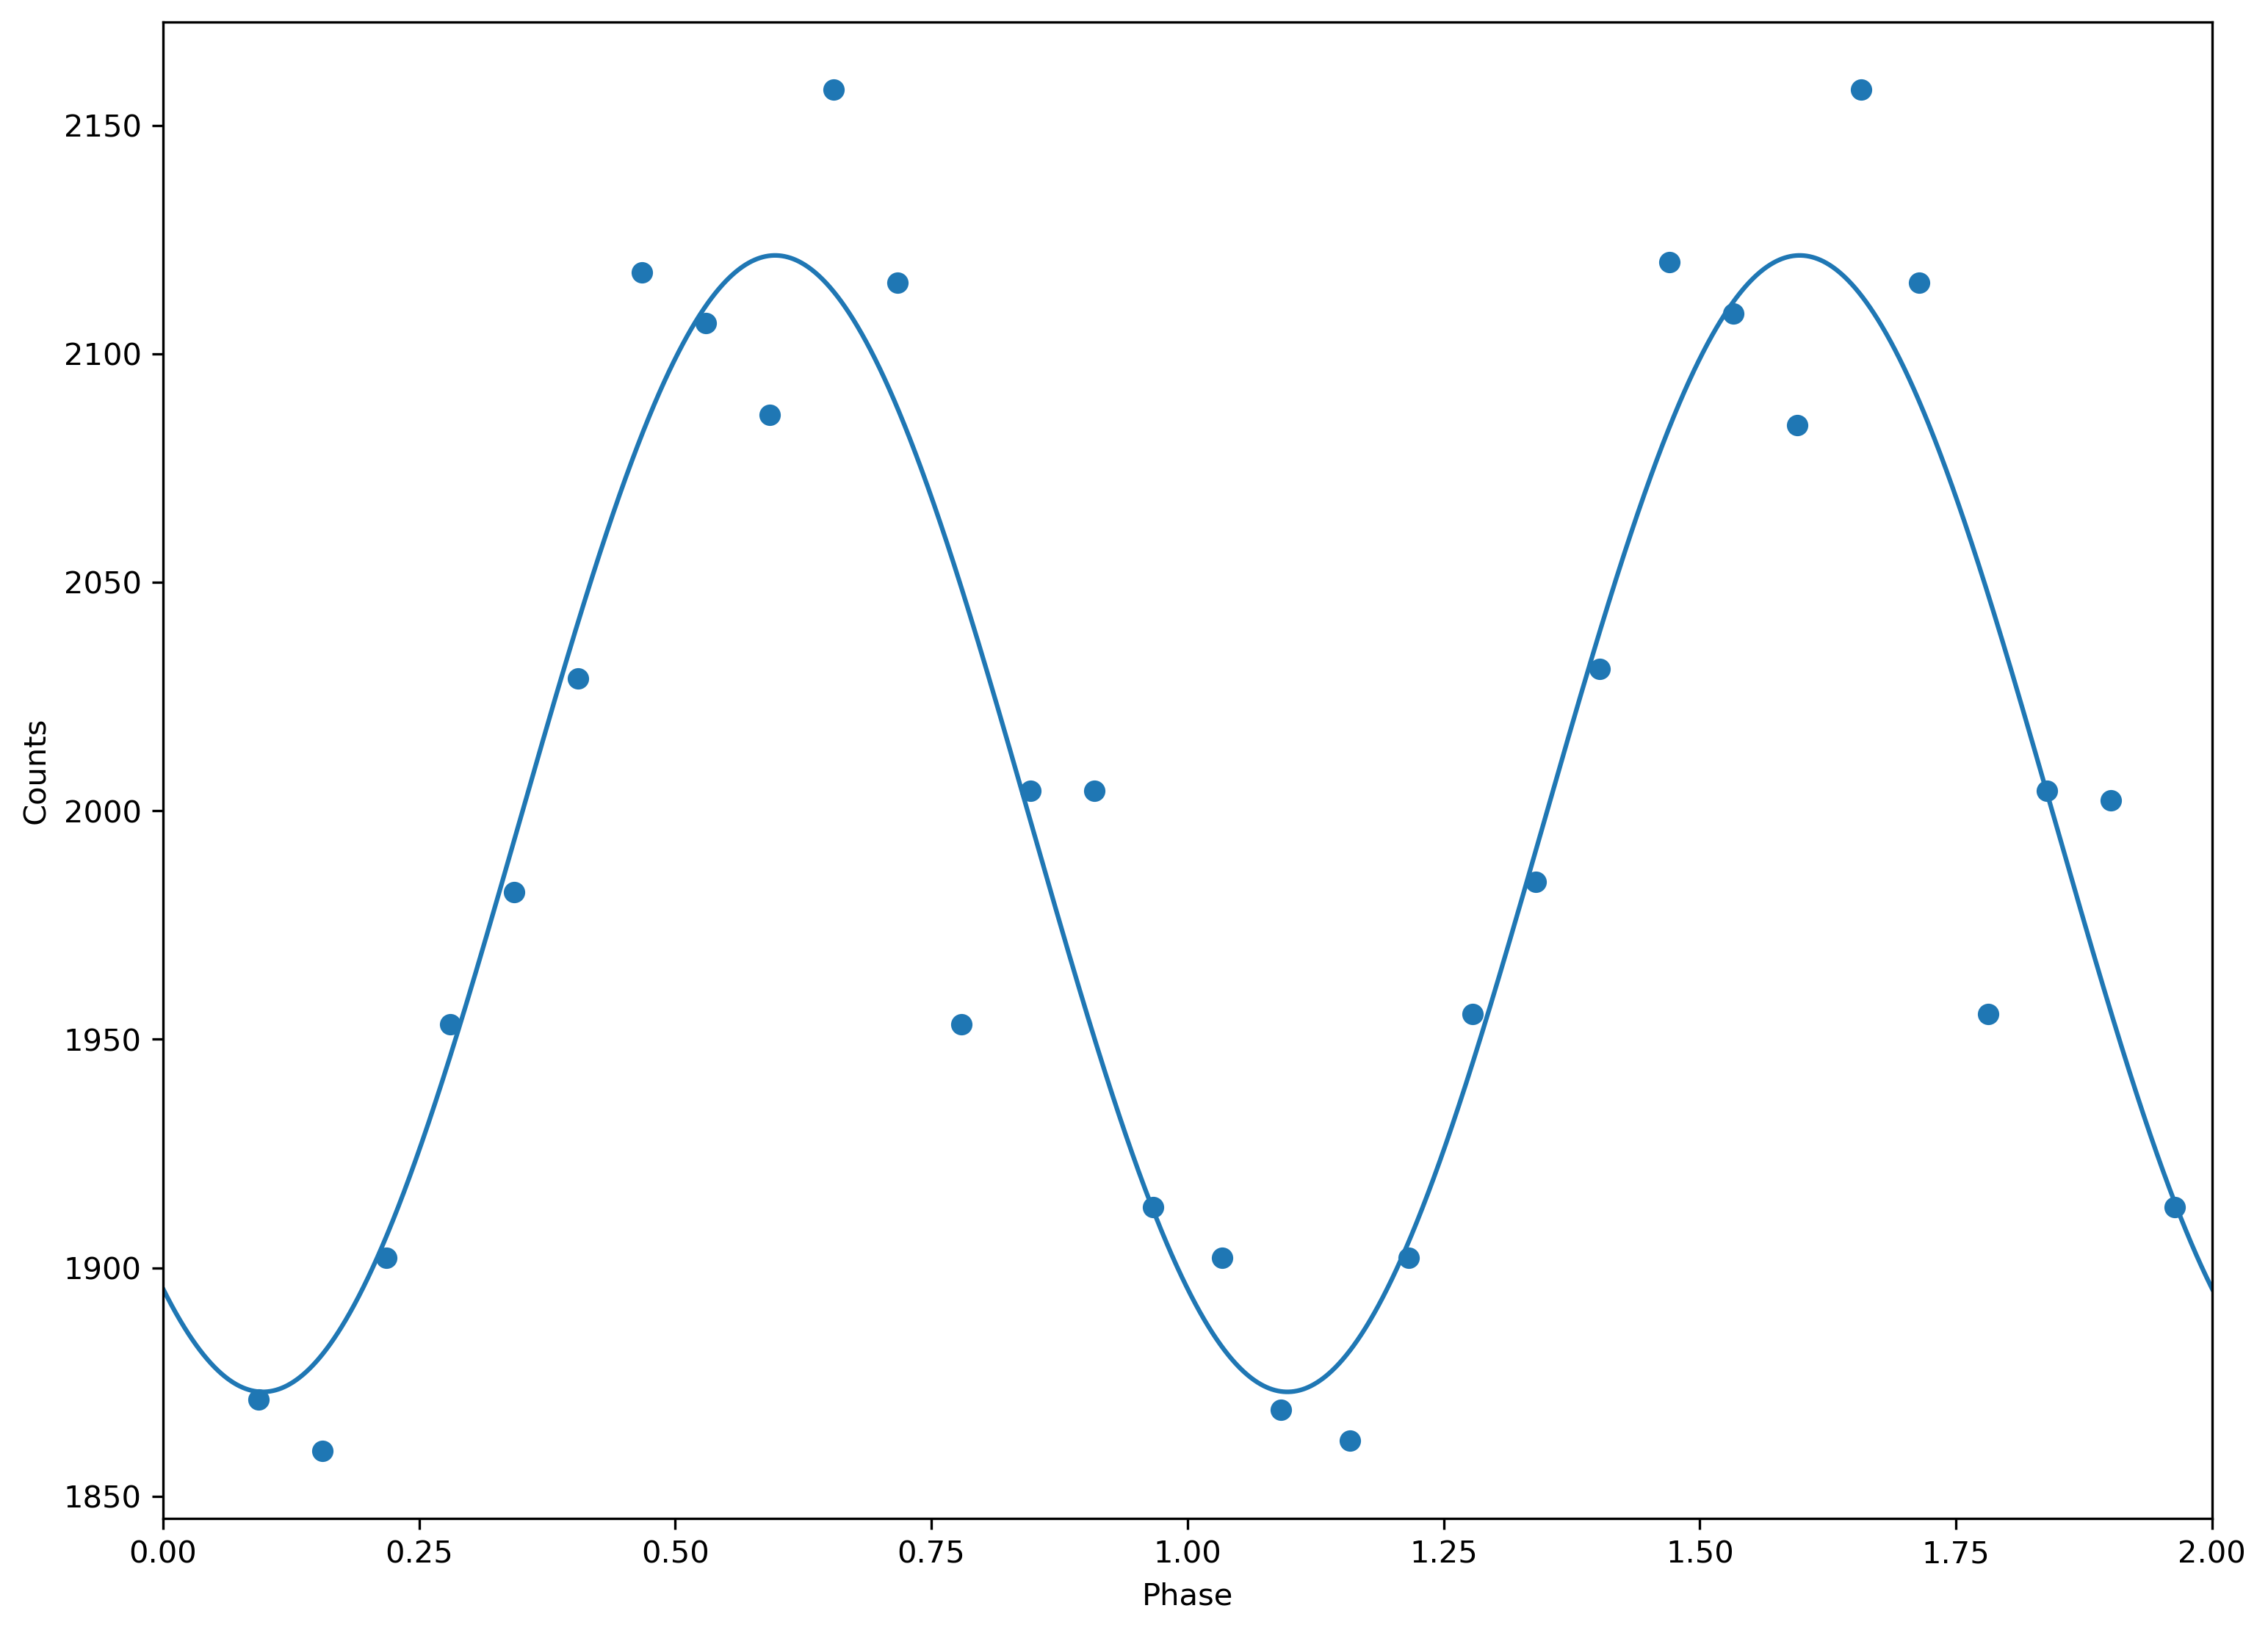

In [12]:
# CXOU J171405.7-381031
# set lapse as 1/3, 2 hot spots, 軸対象, 定常放射なし



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu_1(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

def mu_2(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * (x - 1) - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('PSR J1622−4950_0.3-8keV_Chandra_NuSTAR_counts.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([0, 1, 0.2, 0.5, 0.1])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func_1(x, a, b, c, d, e):
    return (mu_1(x, a, b, c, d) + abs(mu_1(x, a, b, c, d))) / 2 + (mu_2(x, -a, b, c, e) + abs(mu_2(x, -a, b, c, e))) / 2



# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func_1, x_data, y_data, p0 = parameter_initial)
print("r_g=3: theta_1, i, phi, amp_1, amp_2", paramater_optimal_1)
fitting_1 = func_1(x, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2], paramater_optimal_1[3], paramater_optimal_1[4])

# paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func_2, x_data, y_data, p0 = parameter_initial)
# print("r_g=3: theta, i amp, quisent =", paramater_optimal_2)
# fitting_2 = func_2(x, paramater_optimal_2[0], paramater_optimal_2[1], paramater_optimal_2[2], paramater_optimal_2[3])

#calculate reduced chisq of this model
y_fit = func_1(x_data, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2], paramater_optimal_1[3], paramater_optimal_1[4])
r = y_data - y_fit
#stdev = 51 / 2793 * y_data
#chisq = np.sum((r / stdev) ** 2)
#N_data = 40 #number of data
#N_para = 5 #number of parameters (of model) used for fitting
#dof = N_data - N_para
#reduced_chisq = chisq / dof

#print("chisq is " , chisq)
#print("Reduced chisq is ", reduced_chisq)

# fig, ax1 = plt.subplots(dpi = 300, figsize = (12, 9))
# plt.scatter(x_data, y_data)
# plt.xlim(0, 2)
# ax1.plot(x, fitting_1, label='r_g=2')
# ax1.set_xlabel('Phase')
# ax1.set_ylabel('Counts')
# ax2 = ax1.twinx()
# ax2.plot(x, fitting_2, color = 'r', label='r_g=3')
# ax1.legend()
# ax2.legend(loc = 'lower right')
# plt.show()

fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting_1)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

0.1932885906040268
r_g=3: theta_1, i, phi, amp_1, amp_2 [-0.93801742  1.2832362  -1.04446091  0.52143948  0.11558173]


Text(0, 0.5, 'Counts')

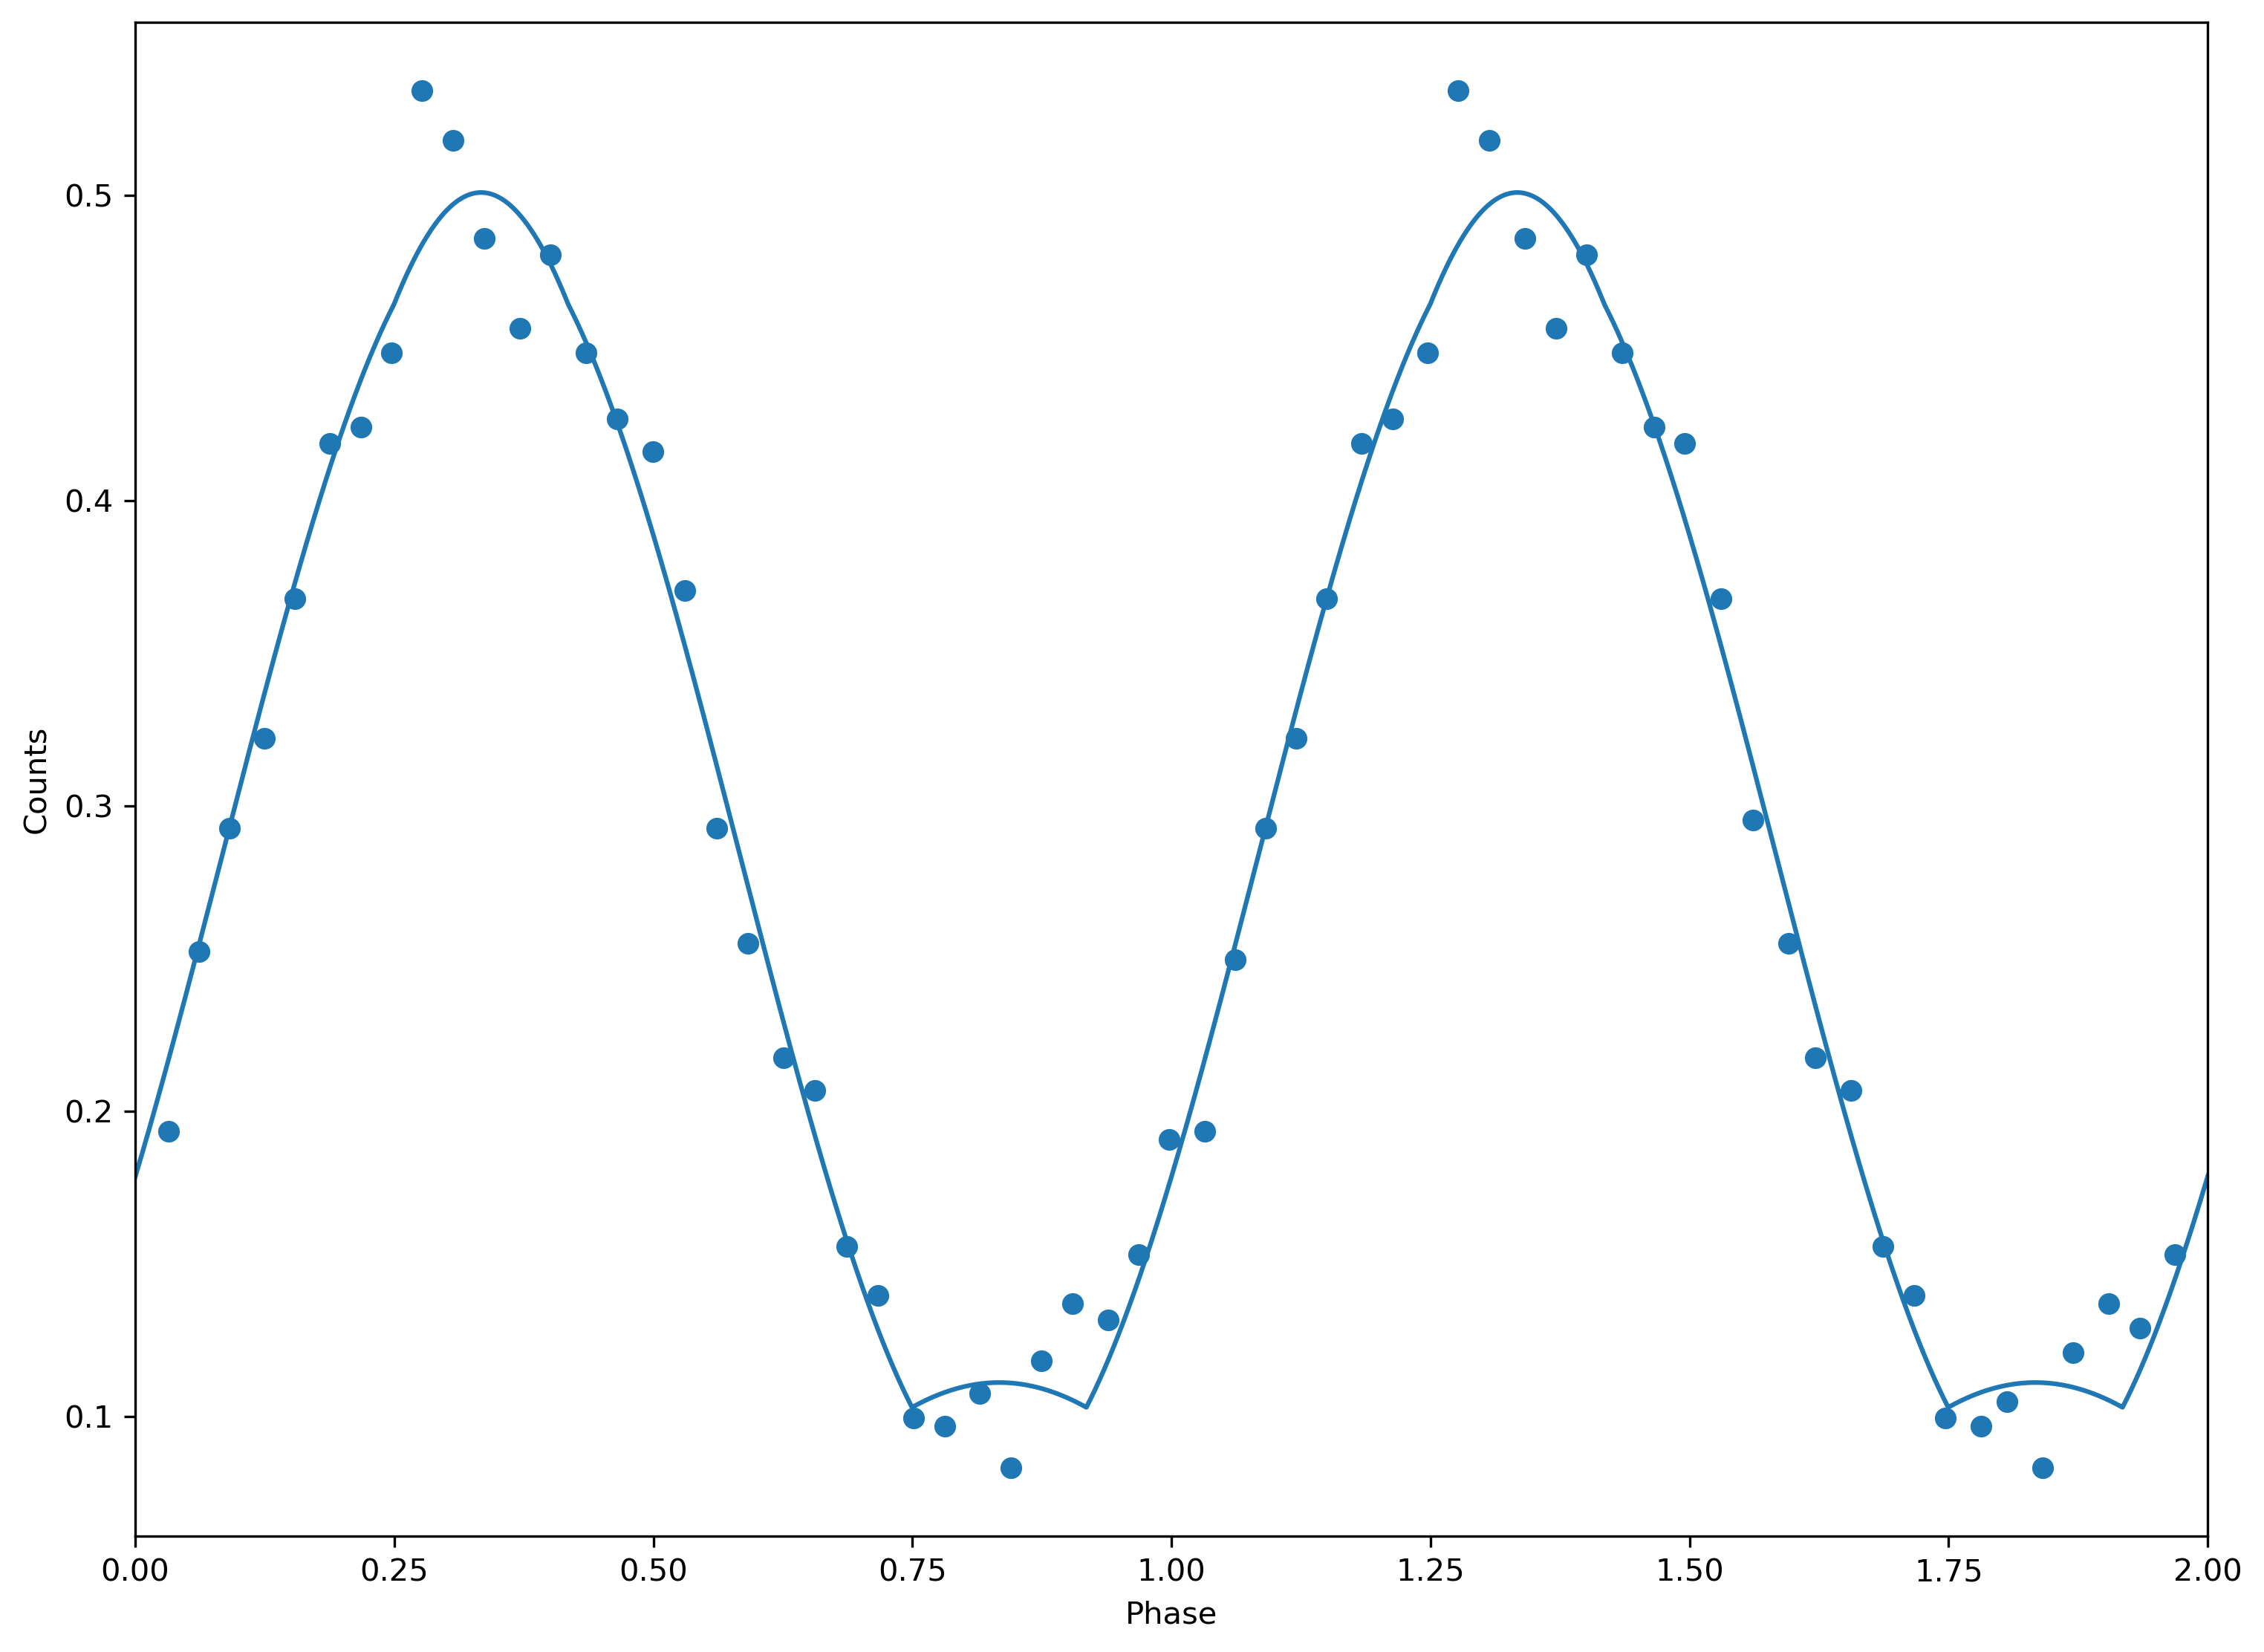

In [13]:
# CXOU J171405.7-381031
# set lapse as 1/3, 2 hot spots, 軸対象, 定常放射なし



import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu_1(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

def mu_2(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * (x - 1) - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 3.) + 1. / 3.)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('SGR 1833-0832.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([0, 1, 0.2, 0.5, 0.1])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func_1(x, a, b, c, d, e):
    return (mu_1(x, a, b, c, d) + abs(mu_1(x, a, b, c, d))) / 2 + (mu_2(x, -a, b, c, e) + abs(mu_2(x, -a, b, c, e))) / 2



# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal_1, covariance_1 = scipy.optimize.curve_fit(func_1, x_data, y_data, p0 = parameter_initial)
print("r_g=3: theta_1, i, phi, amp_1, amp_2", paramater_optimal_1)
fitting_1 = func_1(x, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2], paramater_optimal_1[3], paramater_optimal_1[4])

# paramater_optimal_2, covariance_2 = scipy.optimize.curve_fit(func_2, x_data, y_data, p0 = parameter_initial)
# print("r_g=3: theta, i amp, quisent =", paramater_optimal_2)
# fitting_2 = func_2(x, paramater_optimal_2[0], paramater_optimal_2[1], paramater_optimal_2[2], paramater_optimal_2[3])

#calculate reduced chisq of this model
y_fit = func_1(x_data, paramater_optimal_1[0], paramater_optimal_1[1], paramater_optimal_1[2], paramater_optimal_1[3], paramater_optimal_1[4])
r = y_data - y_fit
#stdev = 51 / 2793 * y_data
#chisq = np.sum((r / stdev) ** 2)
#N_data = 40 #number of data
#N_para = 5 #number of parameters (of model) used for fitting
#dof = N_data - N_para
#reduced_chisq = chisq / dof

#print("chisq is " , chisq)
#print("Reduced chisq is ", reduced_chisq)

# fig, ax1 = plt.subplots(dpi = 300, figsize = (12, 9))
# plt.scatter(x_data, y_data)
# plt.xlim(0, 2)
# ax1.plot(x, fitting_1, label='r_g=2')
# ax1.set_xlabel('Phase')
# ax1.set_ylabel('Counts')
# ax2 = ax1.twinx()
# ax2.plot(x, fitting_2, color = 'r', label='r_g=3')
# ax1.legend()
# ax2.legend(loc = 'lower right')
# plt.show()

fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting_1)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')

0.1932885906040268
r_g=3: theta_1, i, amp [-1.21841803  0.75717872 -1.05119324  0.5245893 ]


Text(0, 0.5, 'Counts')

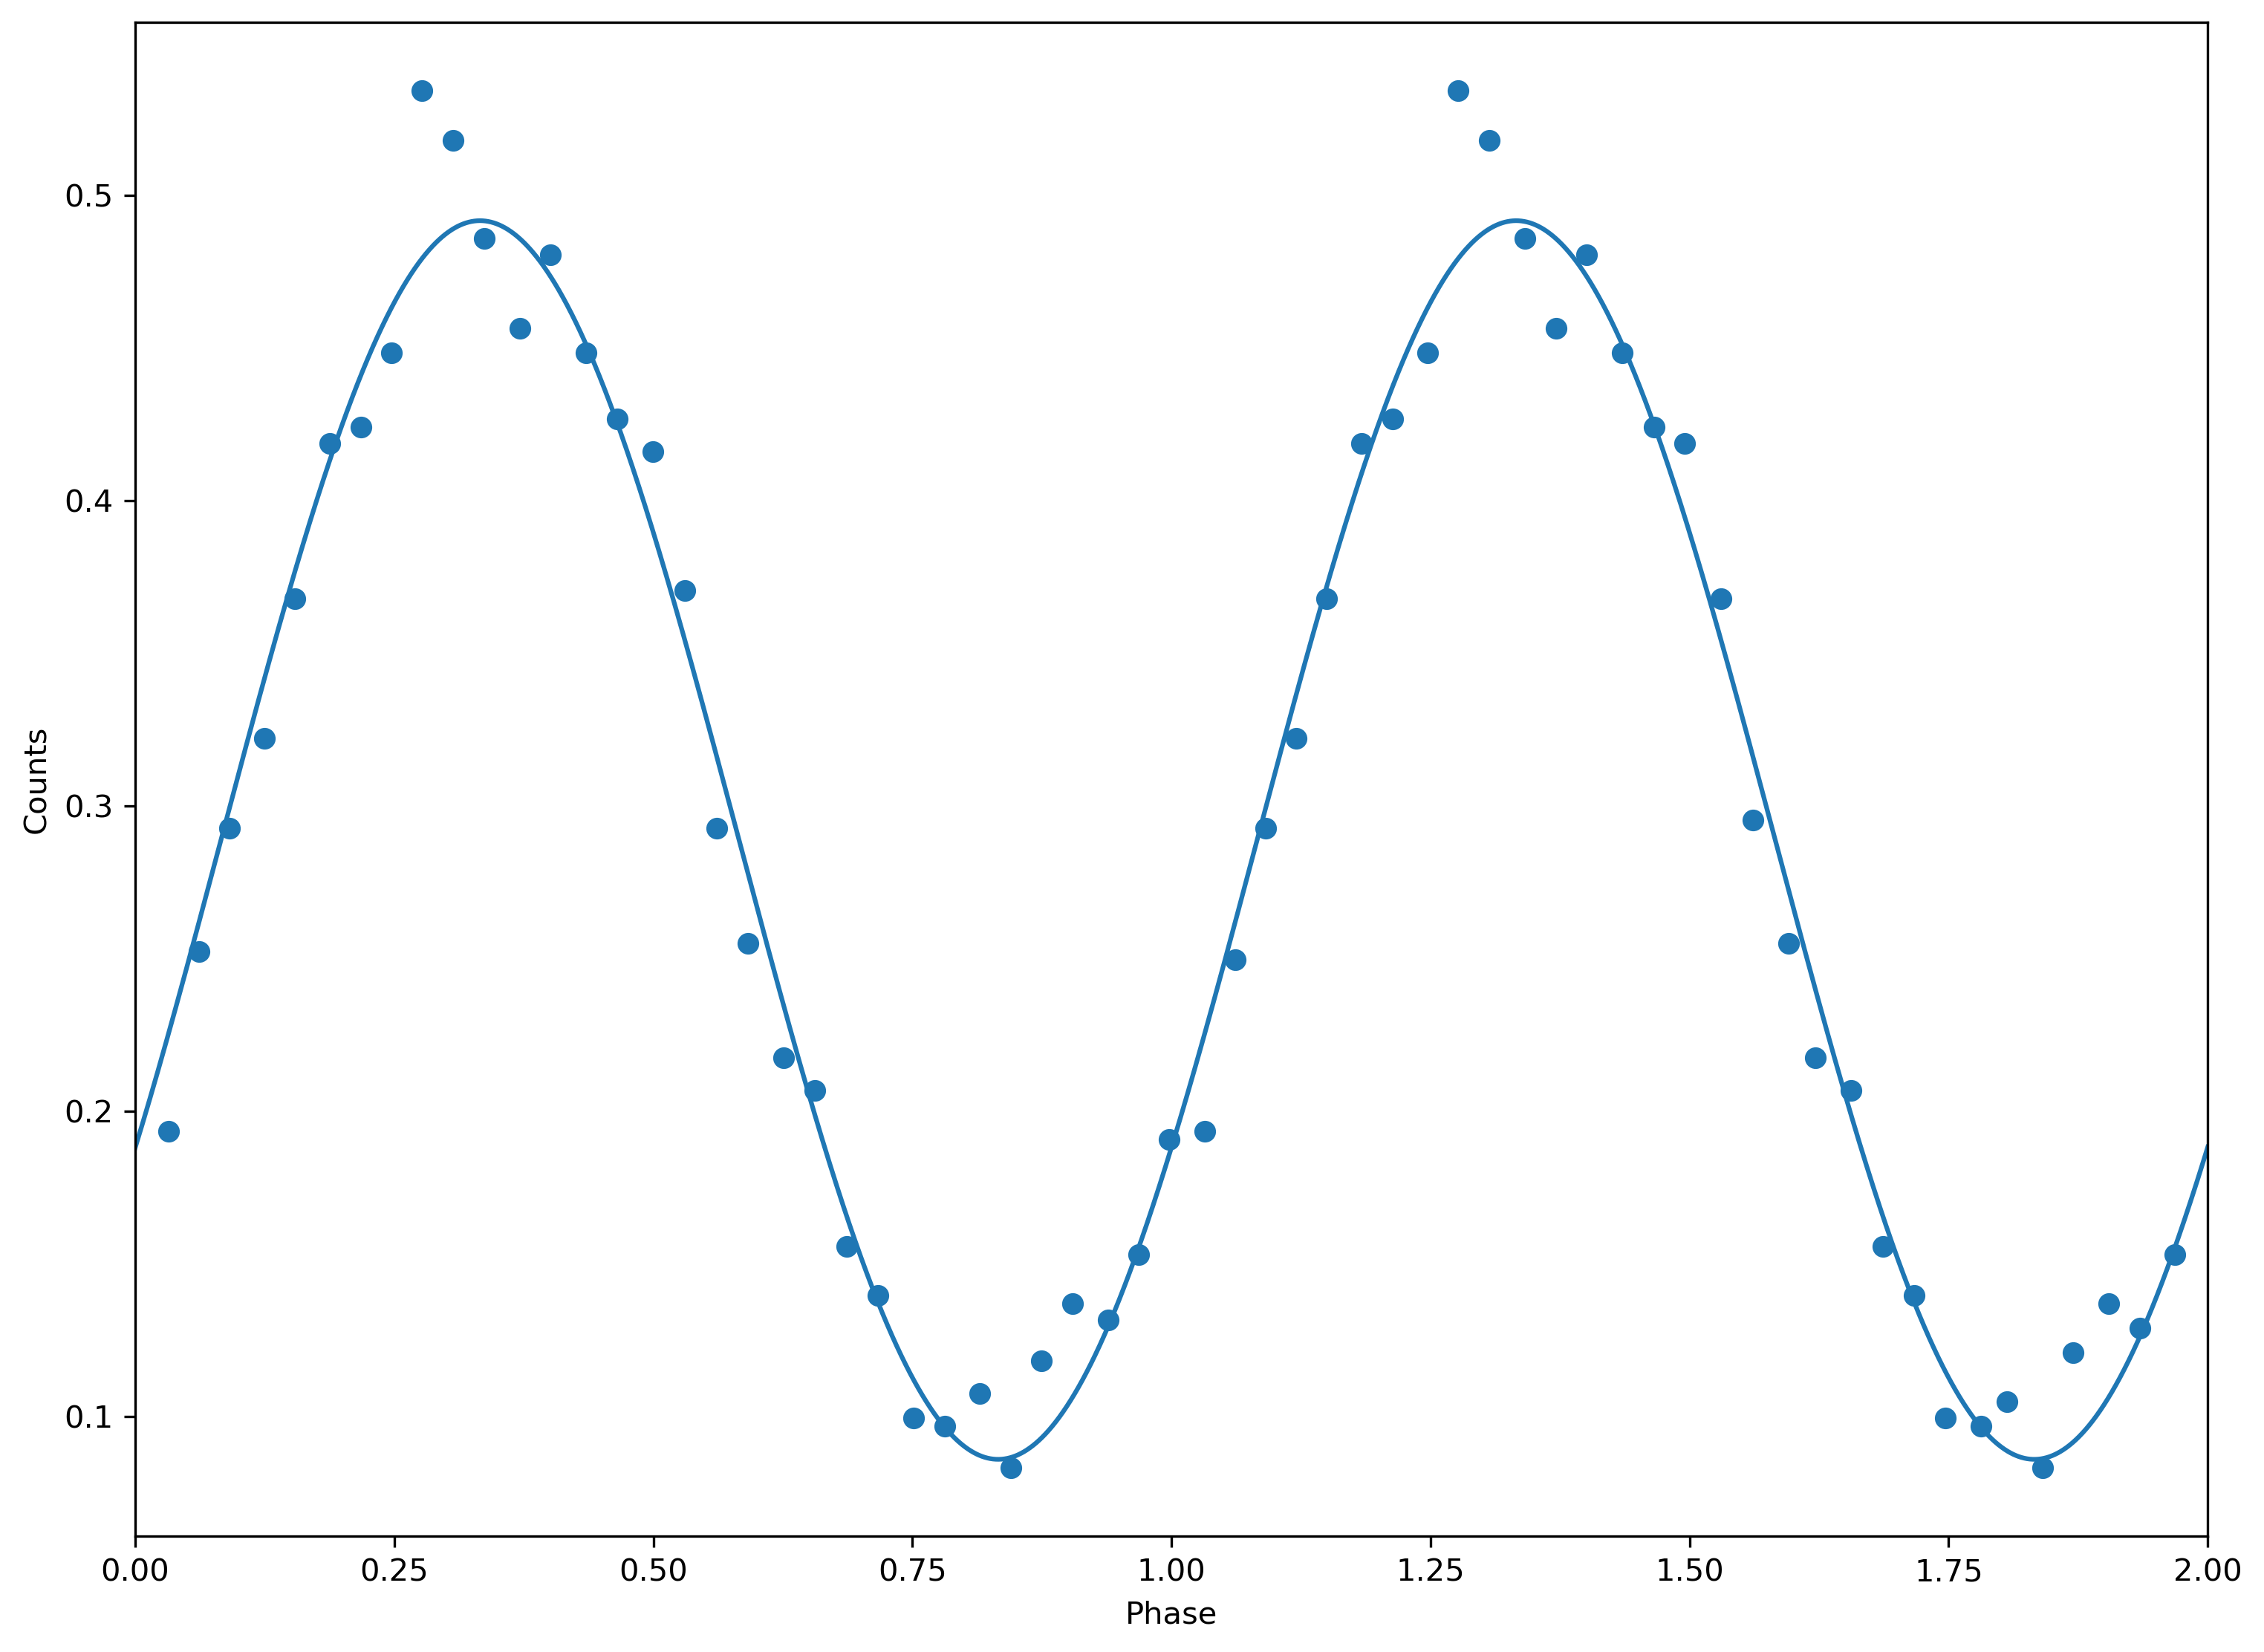

In [14]:
#set lapse as 1/3, single hot spot with beaming effect

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

def mu(x, theta, i, phi, m):
    y = np.sin(theta) * np.sin(i) * np.cos(2 * 3.1415926 * x - phi) + np.cos(theta) * np.cos(i)
    F = m * (y * (1. - 1. / 2.5) + 1. / 2.5)
    return F

#1E 1048.1−5937 from paper:NUSTAR OBSERVATIONS OF MAGNETAR 1E 1048.1−5937     Auther:C. Yang
df = pd.read_csv('SGR 1833-0832.csv', header = 0)
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]
#print(x, y)
#only use data of one phase
# x_data = x_data[0:16]
# y_data = y_data[0:16]
print(y_data[0])

x = np.linspace(-0.5, 2.5, 10000)

parameter_initial = np.array([-1.5, 1, 0.2, 0.5])

# def func(x, a, b, c, d):
#     return (a * np.sin(b * 3.1415926 * x + c) + abs(a * np.sin(b * 3.1415926 * x + c))) / 2 + d

#set d as minium y
def func(x, a, b, c, d):
    return (mu(x, a, b, c, d) + abs(mu(x, a, b, c, d))) / 2

# paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
# print(paramater_optimal)
# fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2], paramater_optimal[3])

paramater_optimal, covariance = scipy.optimize.curve_fit(func, x_data, y_data, p0 = parameter_initial)
print("r_g=3: theta_1, i, amp", paramater_optimal)
fitting = func(x, paramater_optimal[0], paramater_optimal[1], paramater_optimal[2],  paramater_optimal[3])

y_fit = func(x_data, *paramater_optimal)
# r = y_data - y_fit
# stdev = 51 / 2793 * y_data
# chisq = np.sum((r / stdev) ** 2)
# N_data = 40
# N_para = 6
# dof = N_data - N_para
# reduced_chisq = chisq / dof

# print("chisq is " , chisq)
# print("Reduced chisq is ", reduced_chisq)


fig, ax = plt.subplots(dpi = 300, figsize = (12, 9))
plt.scatter(x_data, y_data)
plt.xlim(0, 2)
plt.plot(x, fitting)
ax.set_xlabel('Phase')
ax.set_ylabel('Counts')